# Fetus Brain Detection

2024-05-27 16:47:08.747044: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-27 16:47:08.792097: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/autofs/space/bal_004/users/jd1677/singularity-images/tensorflow_2.13.0-gpu/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Issue loading cv2
2024-05-27 16:47:13.308819: I tensorflow/core/c

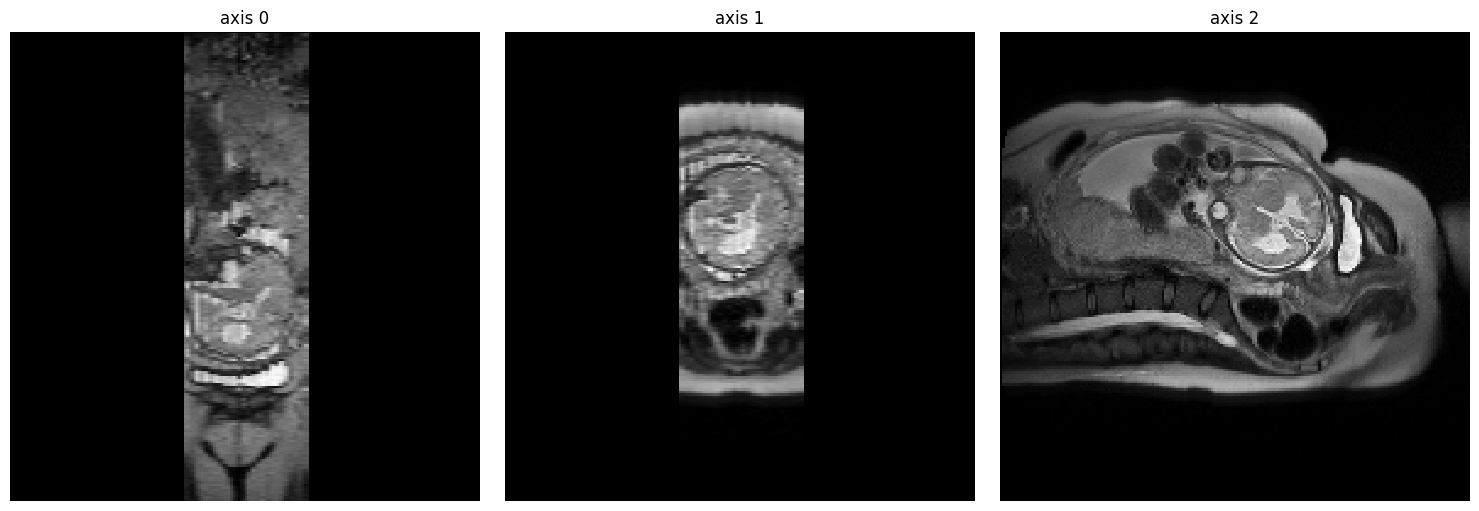

In [1]:
import tensorflow as tf
import numpy as np
from utils import *
import param_3d
import data
import model_3d
from data_3d import *

image_mask_pairs = load_validation_data("validation",192)
a, b = image_mask_pairs[0]

mean_slice_numbers = tuple(np.median(indices) for indices in np.where(b != 0))
ne.plot.volume3D(a,slice_nos=mean_slice_numbers);

# Generator

In [1]:
import pathlib
import json
import nibabel as nib
import numpy as np
import tensorflow as tf
from utils import *
import param_3d


# feta = pathlib.Path('feta_resized_192')

feta = pathlib.Path('fetus_label_map')
mgh_files = list(feta.glob('*.nii.gz'))
brain_maps = [np.uint8(sf.load_volume(str(file_path)).data) for file_path in mgh_files]

with open("params_192.json", "r") as json_file:
    config = json.load(json_file)

feta_files = list(feta.glob('*.nii.gz'))
# feta_label_maps = [np.uint8(f.dataobj) for f in map(nib.load, feta_files)]
# brain_maps = feta_label_maps
# brain_maps = [tf.cast(brain, tf.uint8) for brain in brain_maps]

# brain_maps = [np.uint8(sf.load_volume(str(file_path)).reshape([param_3d.img_size_48,]*3).data) for file_path in feta_files]


model_feta_config = config["feta_48"]
model_shapes_config = config["shapes"]
model3_config = config["labels_to_image_model_gmm"]
model3_config["labels_out"] = {int(key): value for key, value in model3_config["labels_out"].items()}
model_feta_config["in_shape"]=[ param_3d.img_size_48, param_3d.img_size_48, param_3d.img_size_48]
model3_config["in_shape"]=[ param_3d.img_size_48, param_3d.img_size_48, param_3d.img_size_48]
model_shapes_config["in_shape"]=[ param_3d.img_size_48, param_3d.img_size_48, param_3d.img_size_48]

model_feta = create_model(model_feta_config)
model_shapes = create_model(model_shapes_config)


positions, indices = generate_position_map((192,192,192), param_3d.img_size_48, 4)
labels_to_image_model = create_model(model3_config)

gen=generator_brain_gmm(brain_maps,param_3d.img_size_48)


2024-06-07 16:24:41.881125: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/autofs/space/bal_004/users/jd1677/singularity-images/tensorflow_2.13.0-gpu/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Issue loading cv2
2024-06-07 16:24:46.075007: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 31141 MB memory:  -> device: 0, name: Tesla V100-SXM2-32GB, pci bus id: 0000:1a:00.0, compute capability: 7.0


(None, 128, 128, 128, 1)
(None, 128, 128, 128, 1)
(64, 64, 64, 3)
(None, 128, 128, 128, 1)
(None, 128, 128, 128, 1)
(None, 128, 128, 128, 1)
(None, 128, 128, 128, 1)
Tensor("perlin_noise_1/strided_slice:0", shape=(4,), dtype=int32)
(None, 128, 128, 128, 1)
(None, 128, 128, 128, 1)
(None, 128, 128, 128, 1)
(64, 64, 64, 3)
(None, 128, 128, 128, 1)
(None, 128, 128, 128, 1)
(None, 128, 128, 128, 1)
Tensor("perlin_noise_3/strided_slice:0", shape=(4,), dtype=int32)
(None, 128, 128, 128, 1)
(None, 128, 128, 128, 1)
(None, 128, 128, 128, 1)
(64, 64, 64, 3)
(None, 128, 128, 128, 1)
(None, 128, 128, 128, 1)
(None, 128, 128, 128, 1)
Tensor("perlin_noise_5/strided_slice:0", shape=(4,), dtype=int32)
(None, 128, 128, 128, 1)


(64, 64, 64, 3)


2024-06-07 16:25:11.219550: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600


tf.Tensor([128 128 128   1], shape=(4,), dtype=int32)
(1, 128, 128, 128, 1)


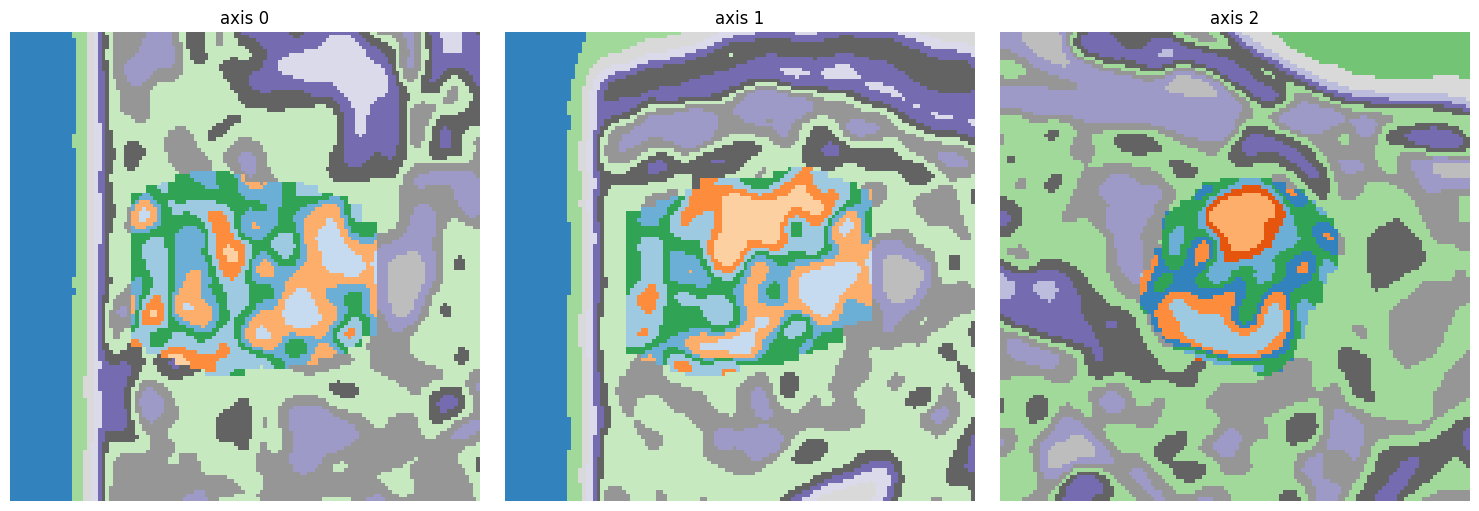

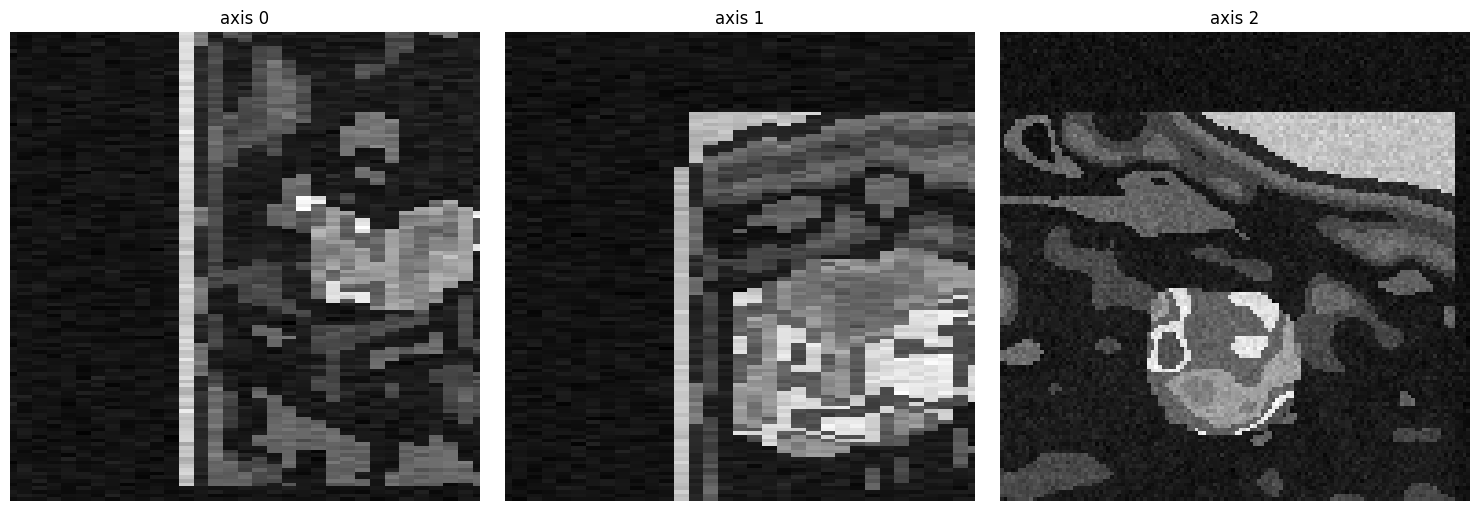

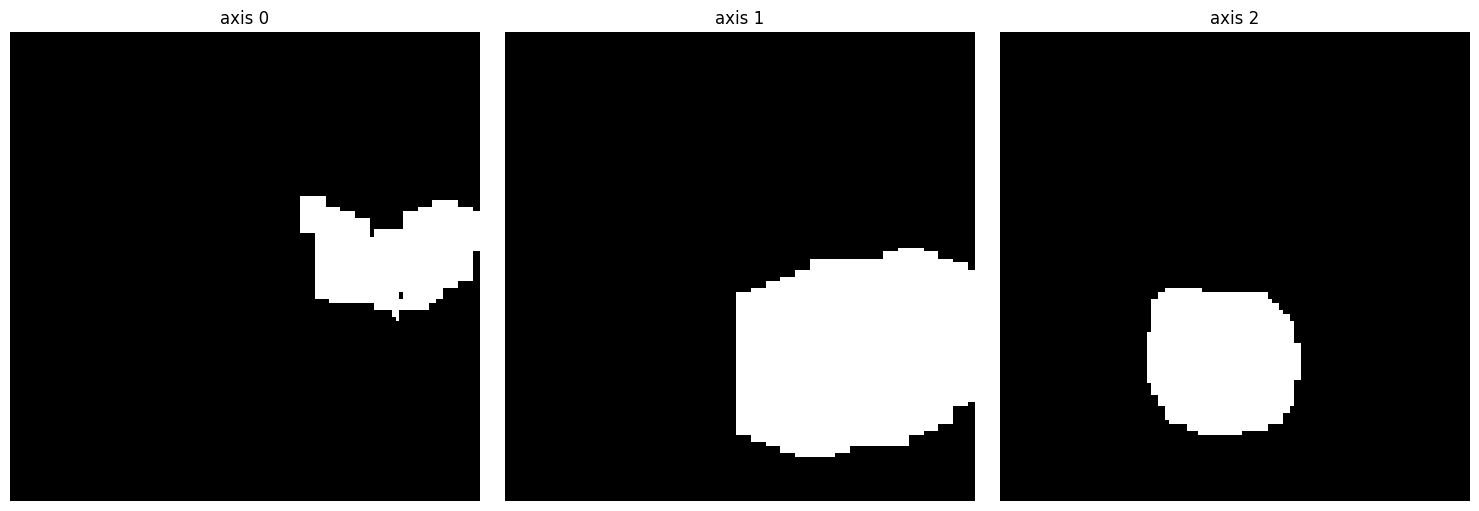

(64, 64, 64, 3)
tf.Tensor([128 128 128   1], shape=(4,), dtype=int32)
(1, 128, 128, 128, 1)


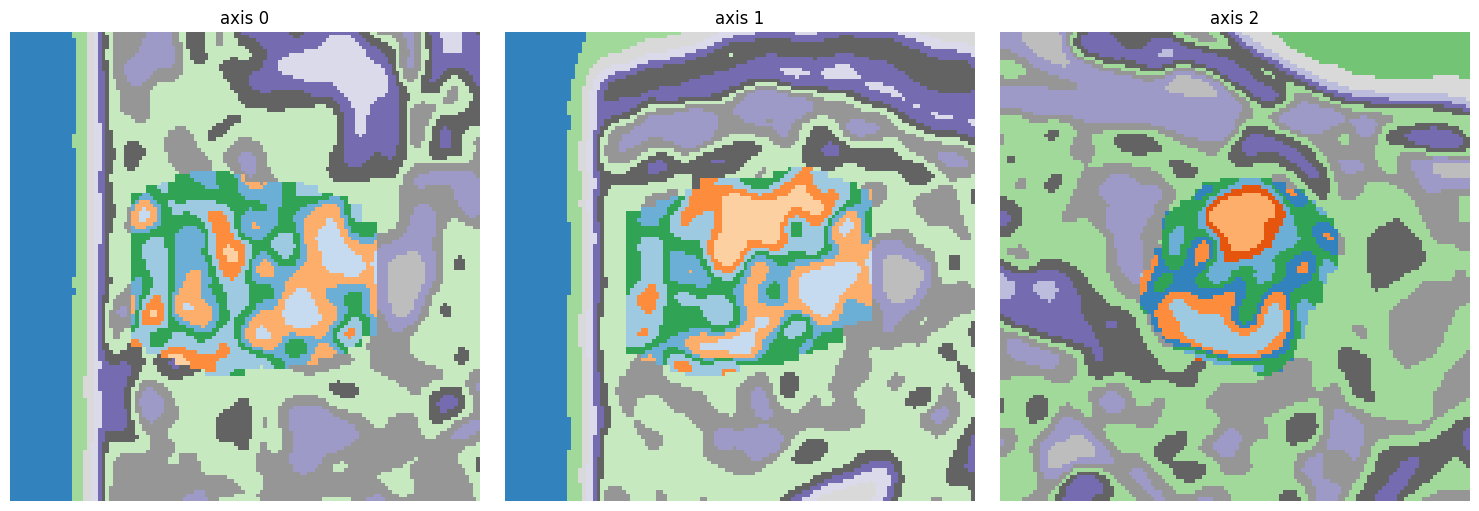

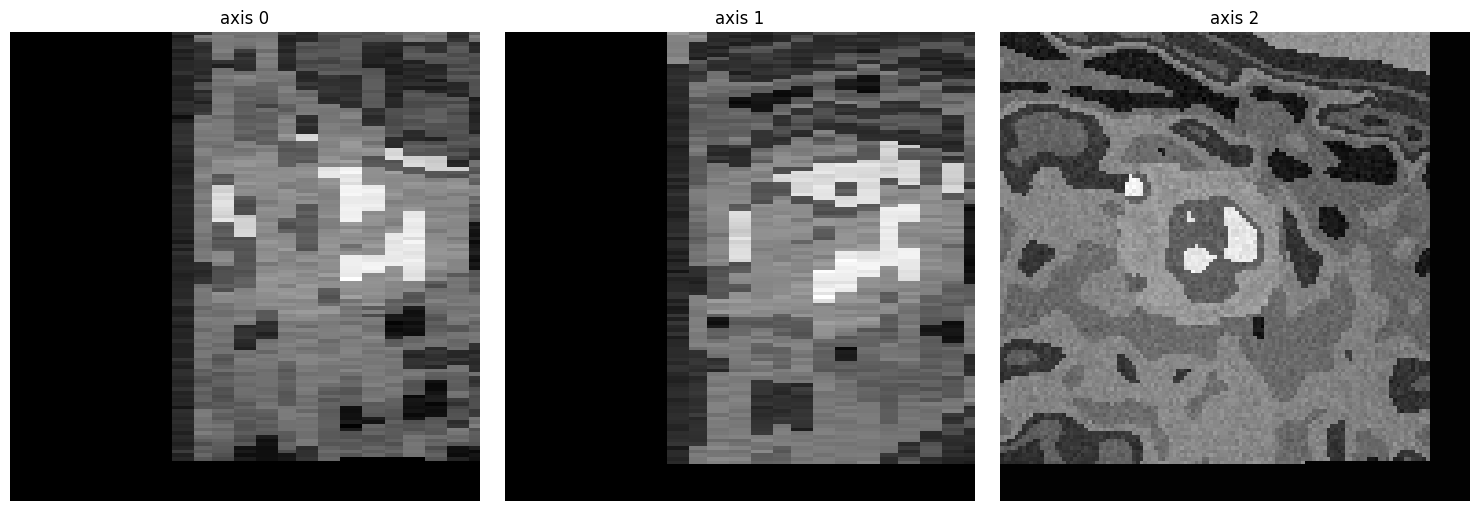

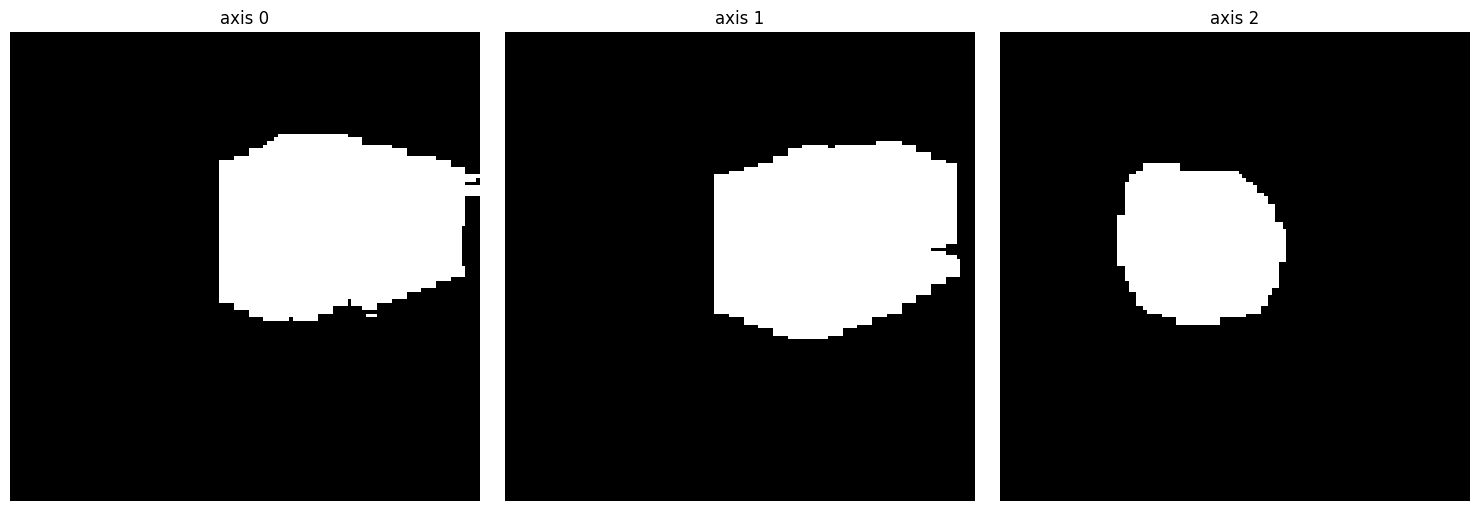

(64, 64, 64, 3)
tf.Tensor([128 128 128   1], shape=(4,), dtype=int32)
(1, 128, 128, 128, 1)


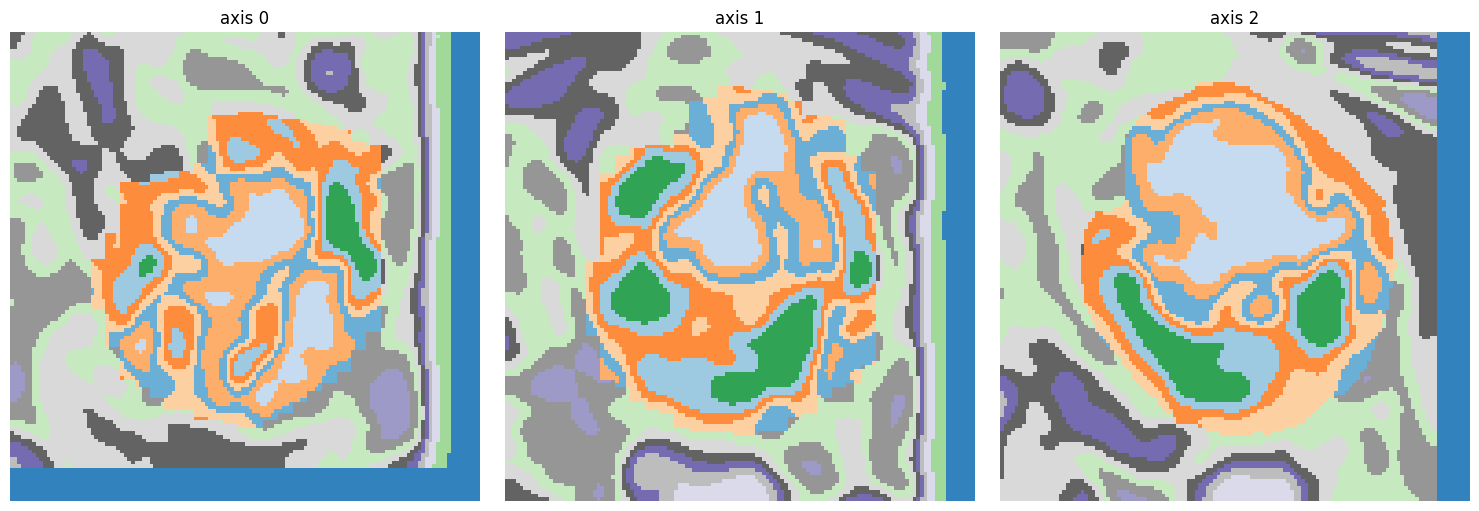

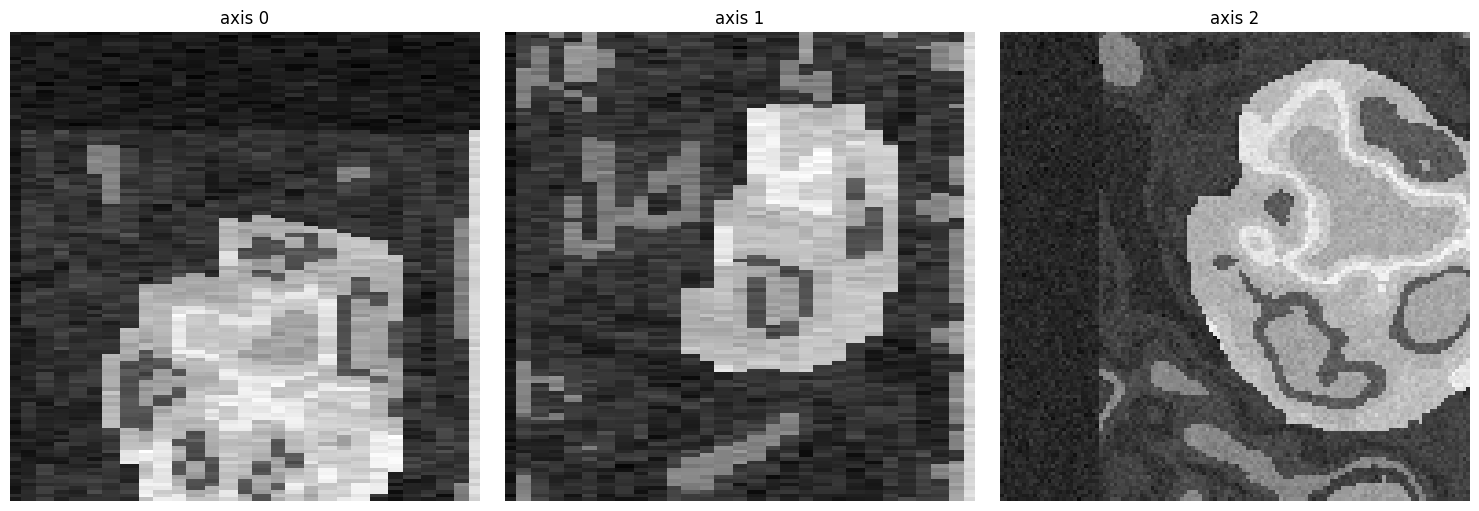

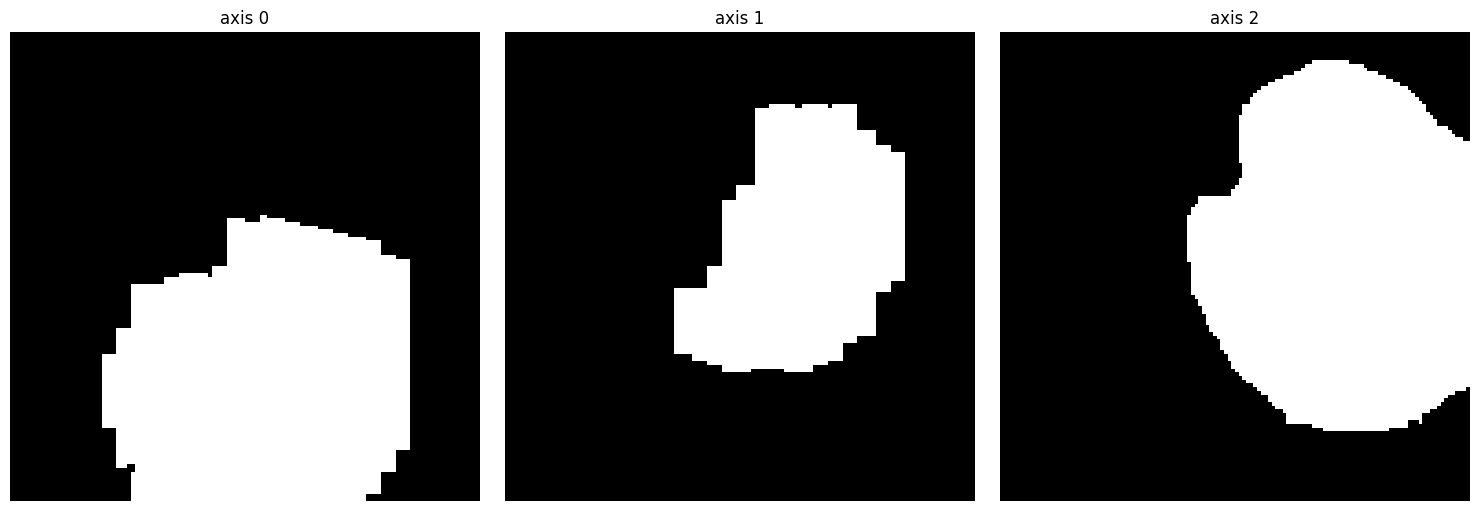

(64, 64, 64, 3)
tf.Tensor([128 128 128   1], shape=(4,), dtype=int32)
(1, 128, 128, 128, 1)


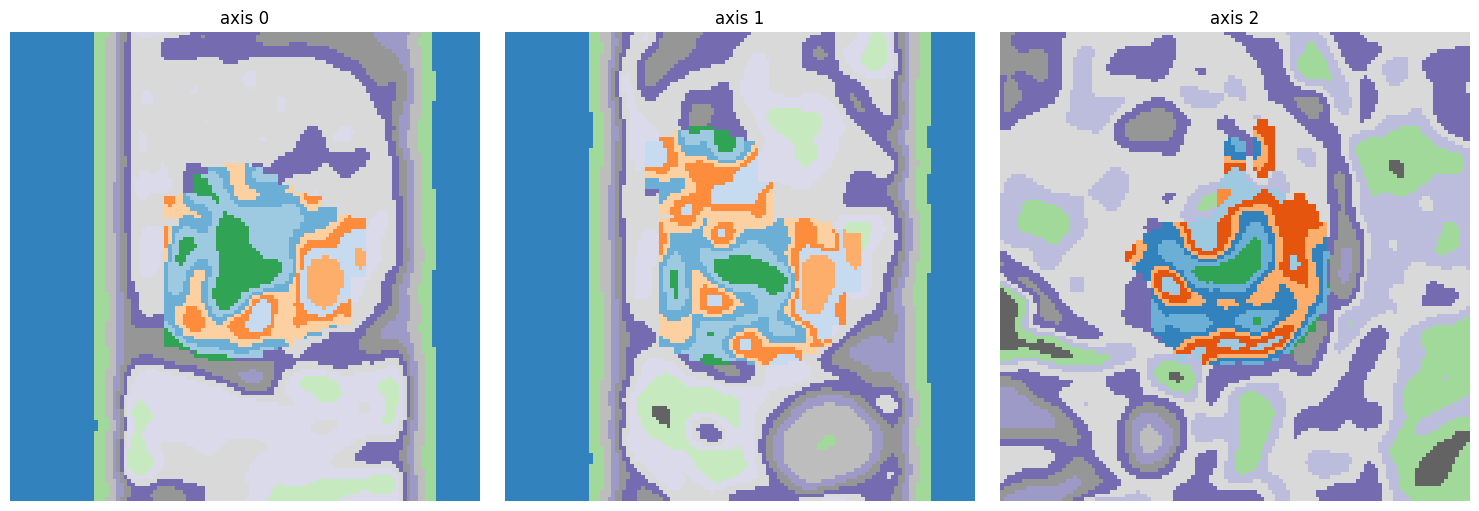

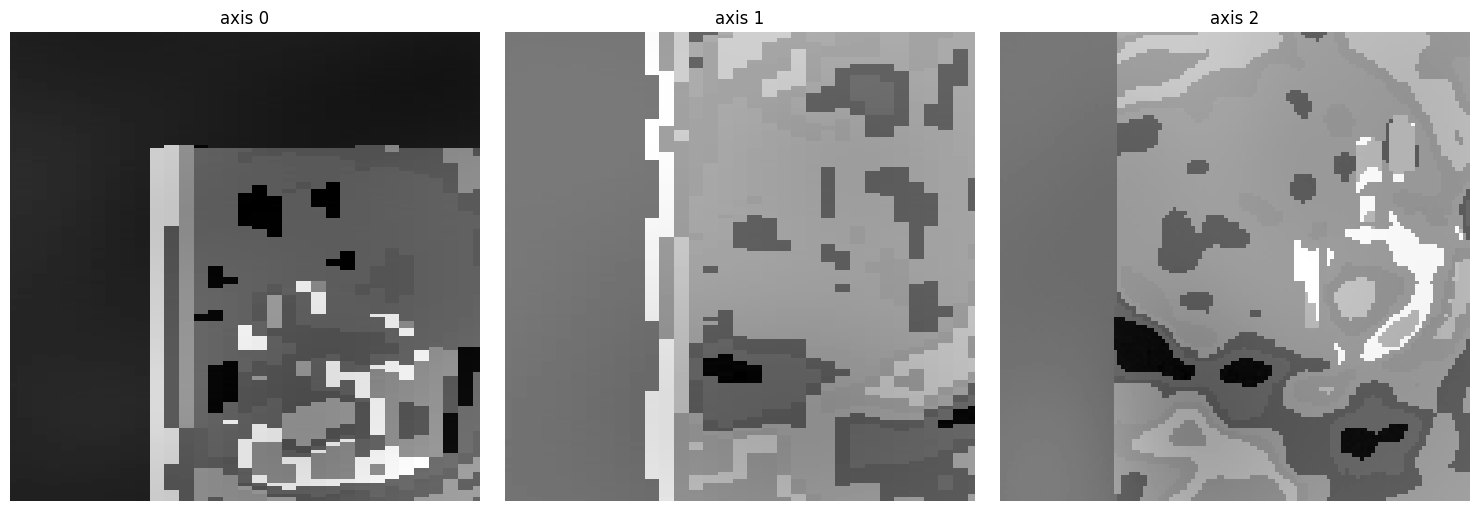

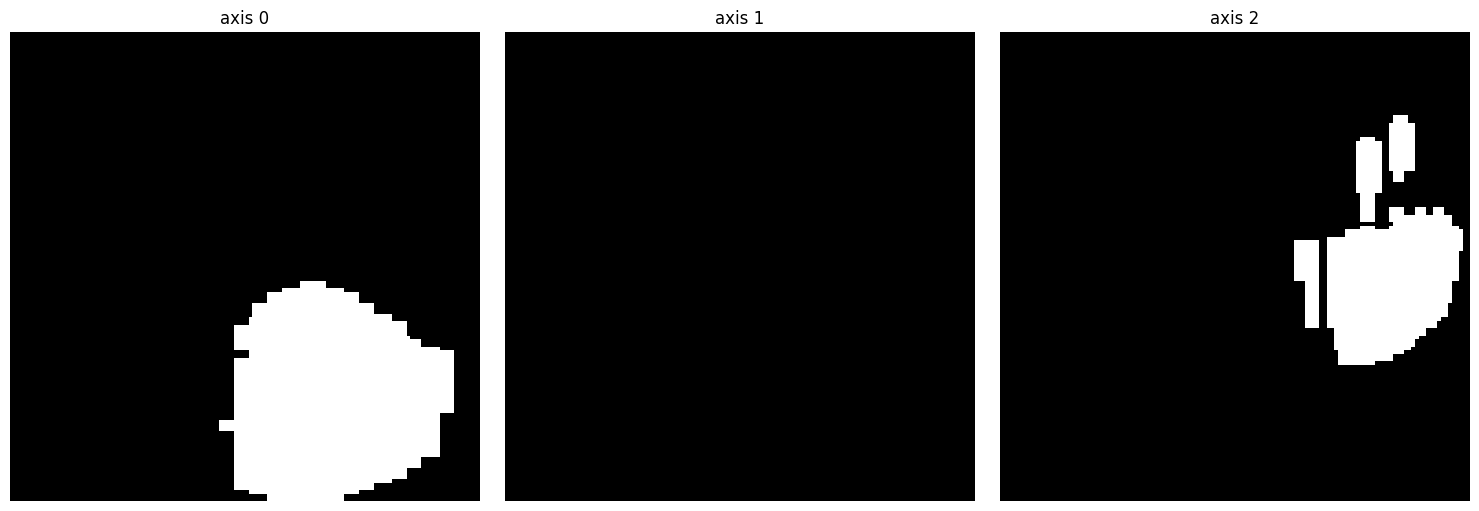

(64, 64, 64, 3)
tf.Tensor([128 128 128   1], shape=(4,), dtype=int32)
(1, 128, 128, 128, 1)


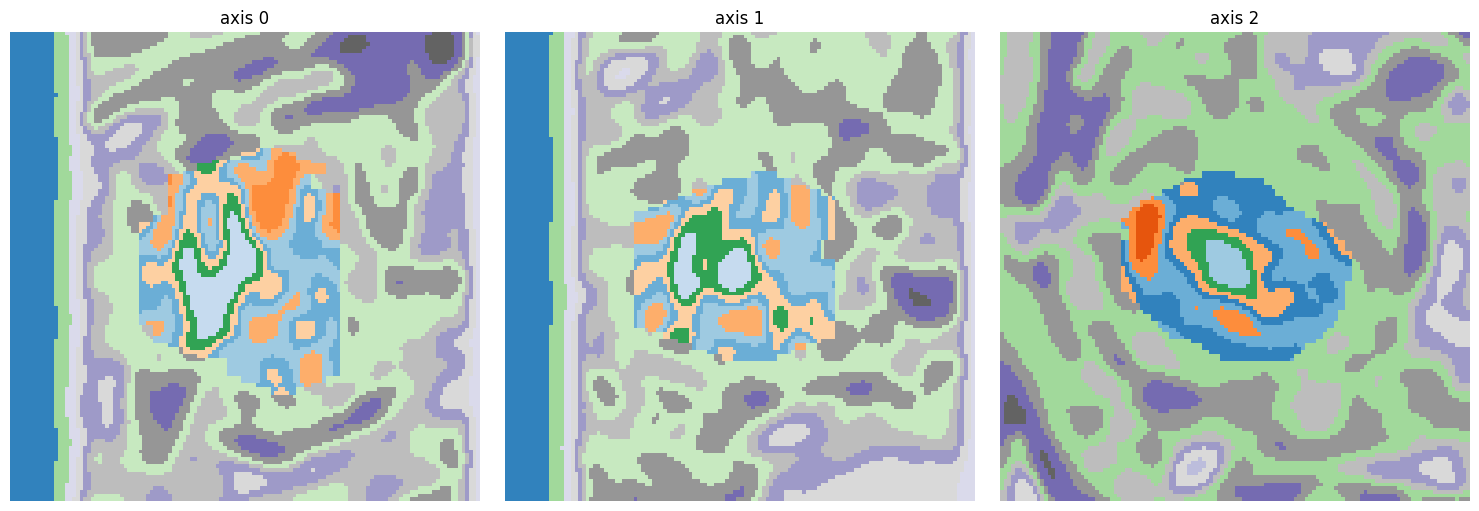

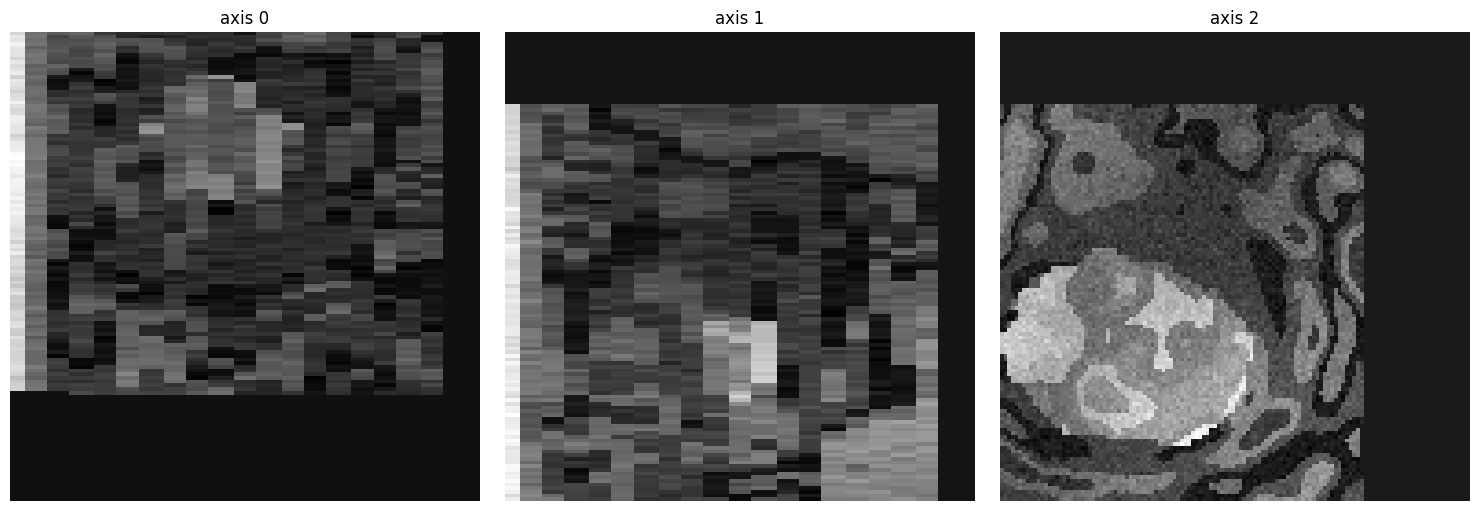

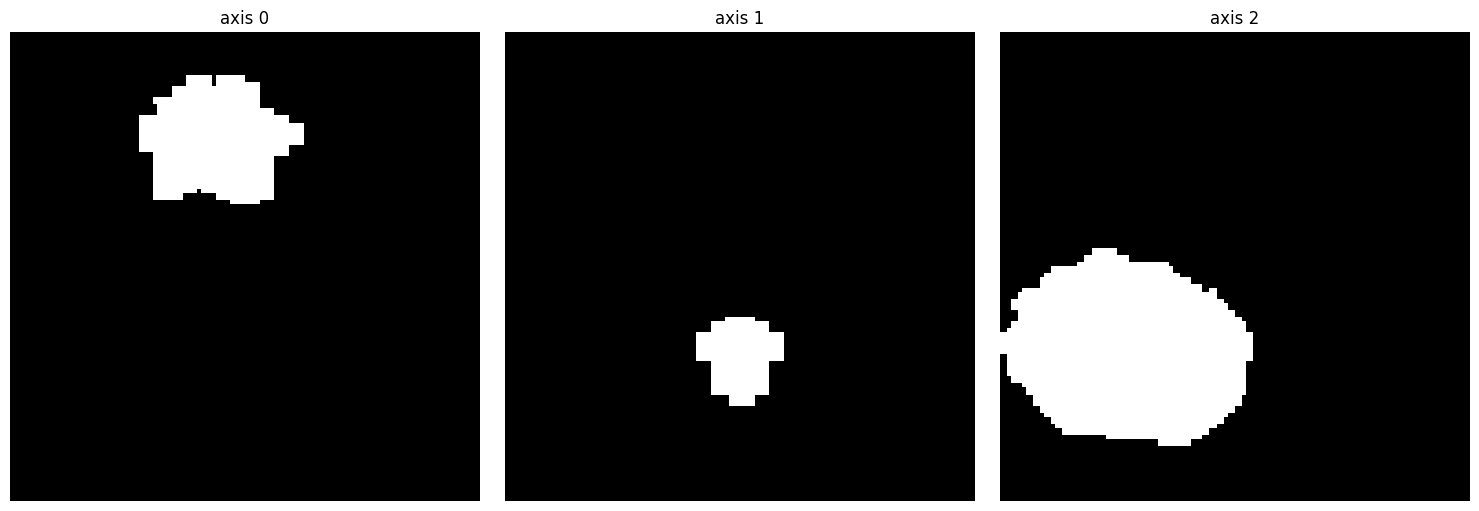

(64, 64, 64, 3)
tf.Tensor([128 128 128   1], shape=(4,), dtype=int32)
(1, 128, 128, 128, 1)


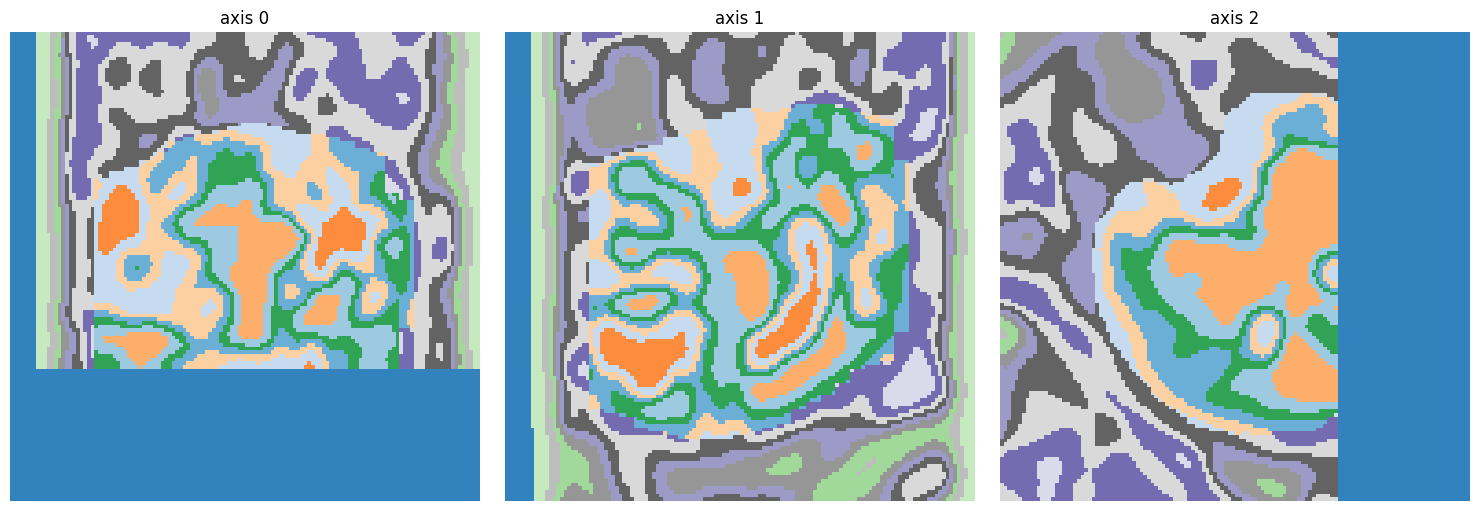

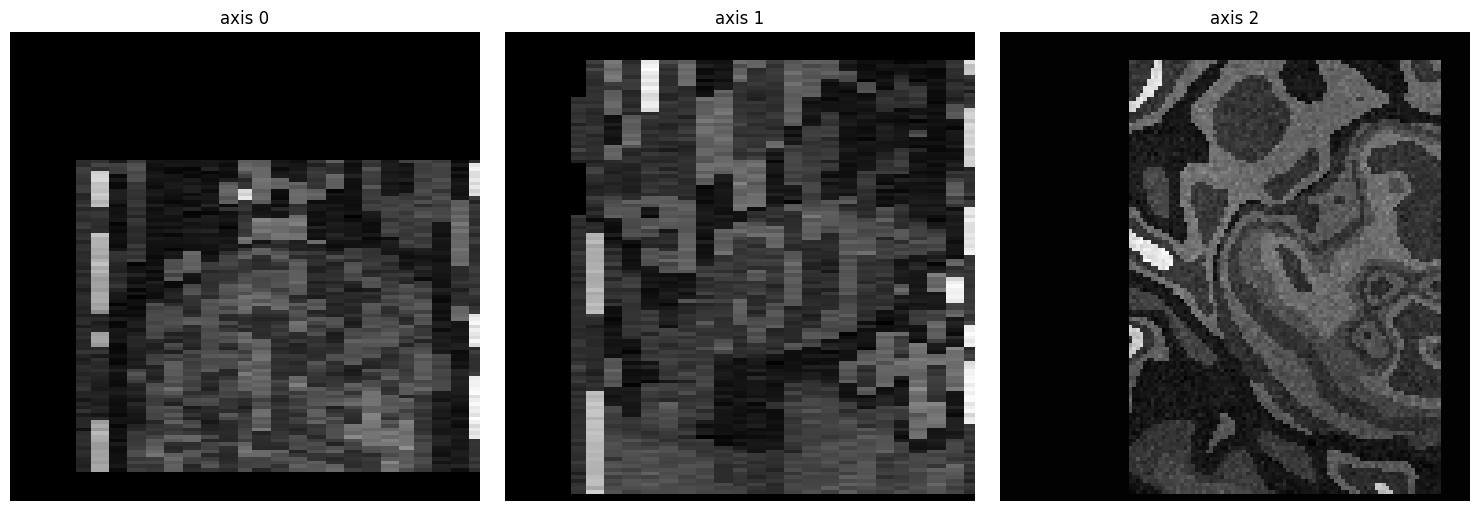

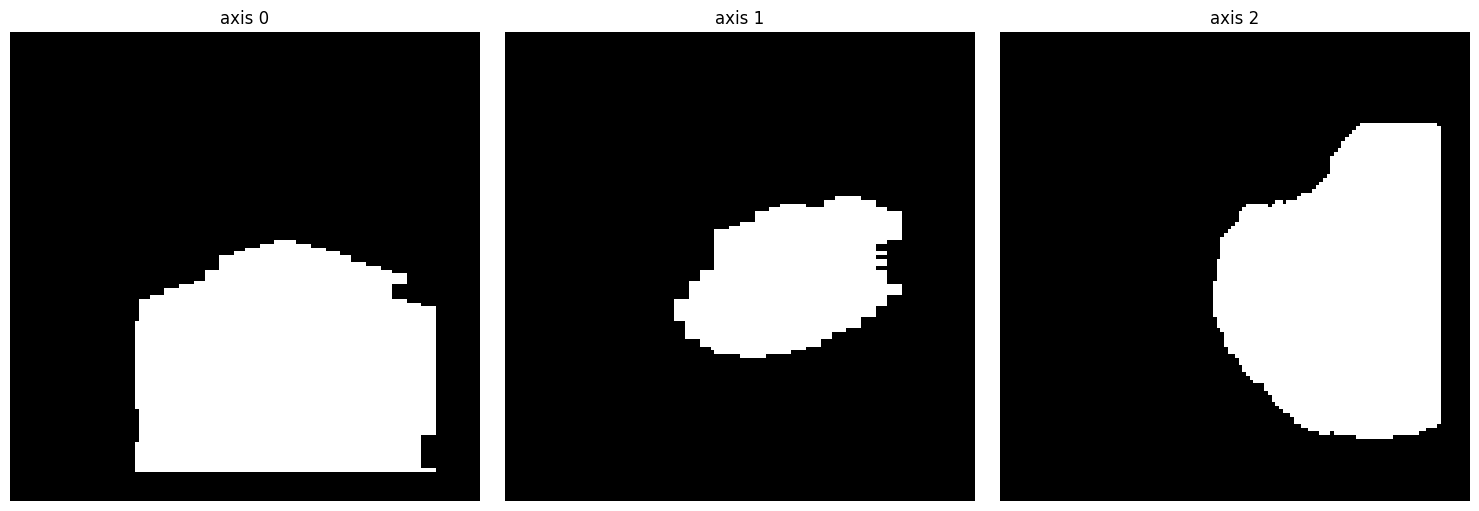

(64, 64, 64, 3)
tf.Tensor([128 128 128   1], shape=(4,), dtype=int32)
(1, 128, 128, 128, 1)


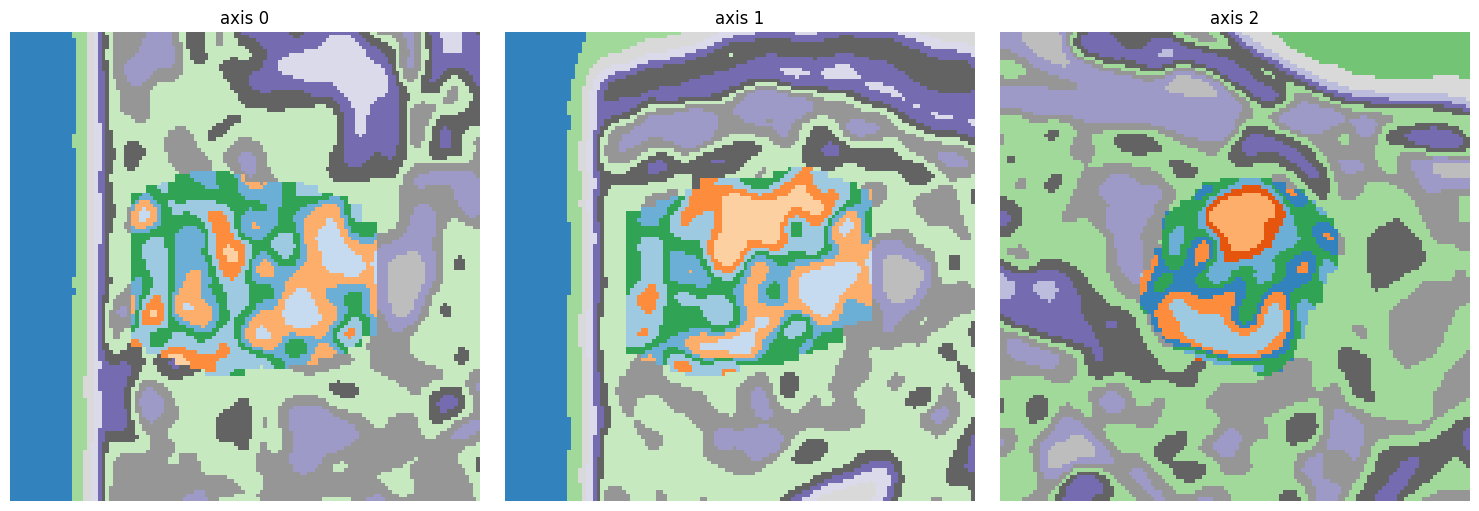

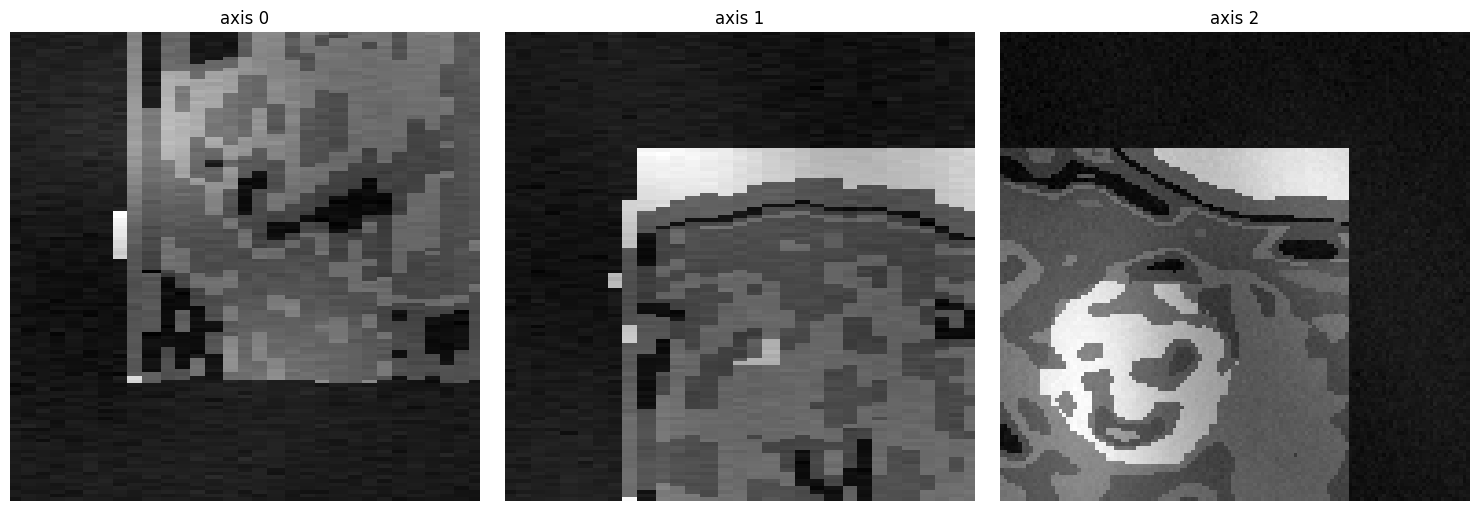

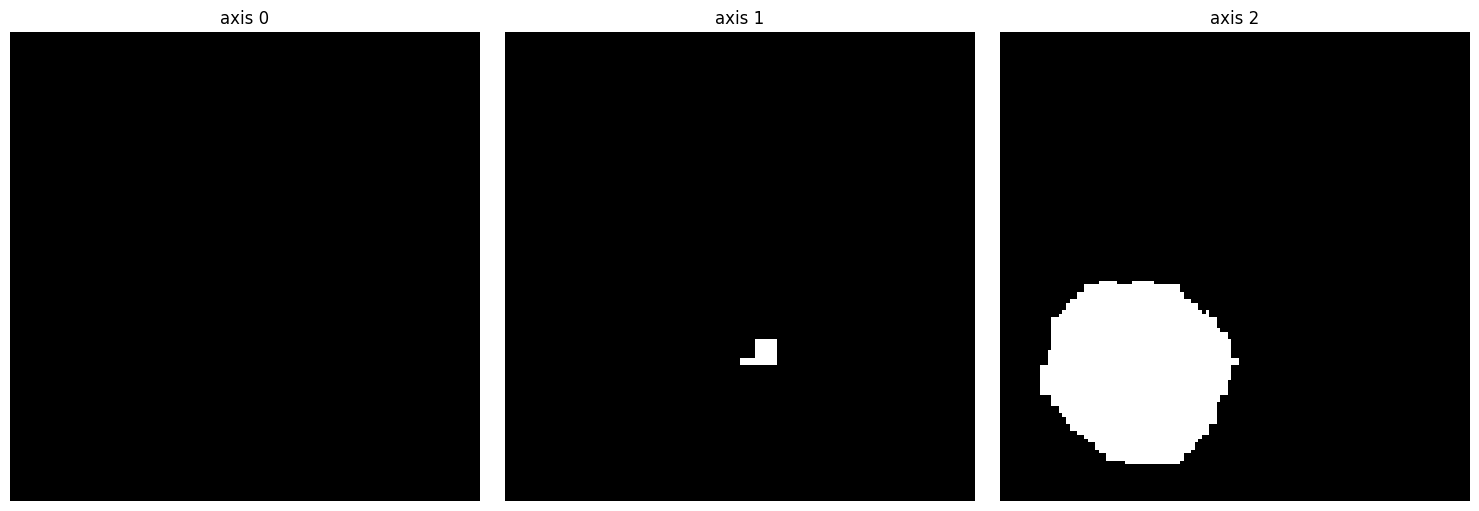

(64, 64, 64, 3)
tf.Tensor([128 128 128   1], shape=(4,), dtype=int32)
(1, 128, 128, 128, 1)


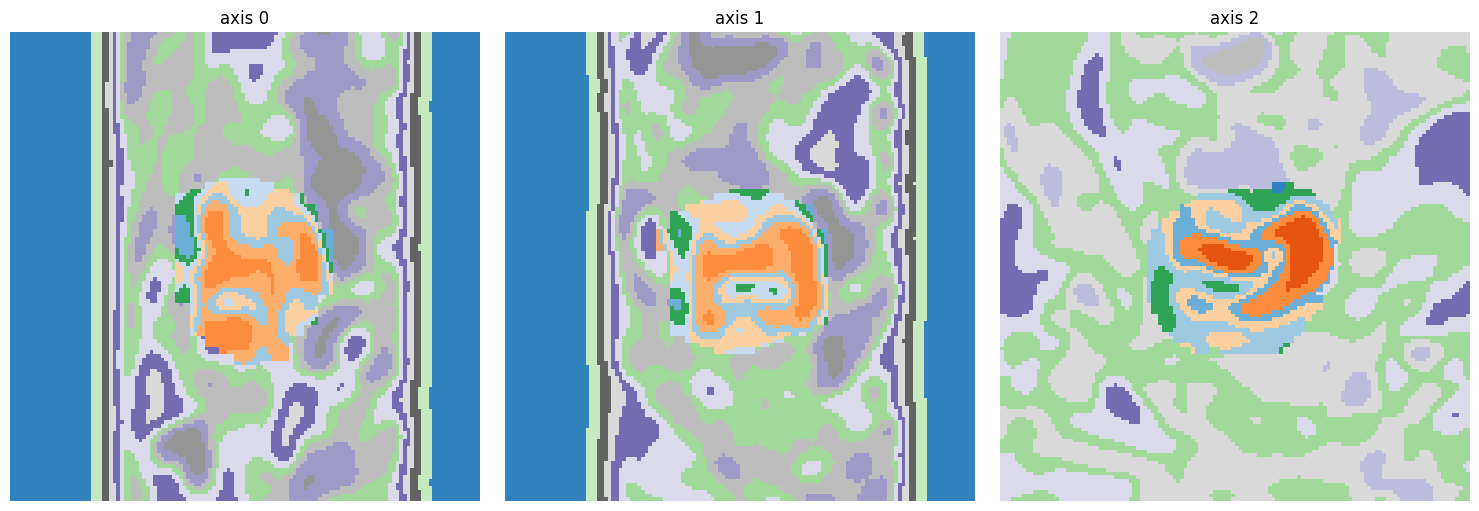

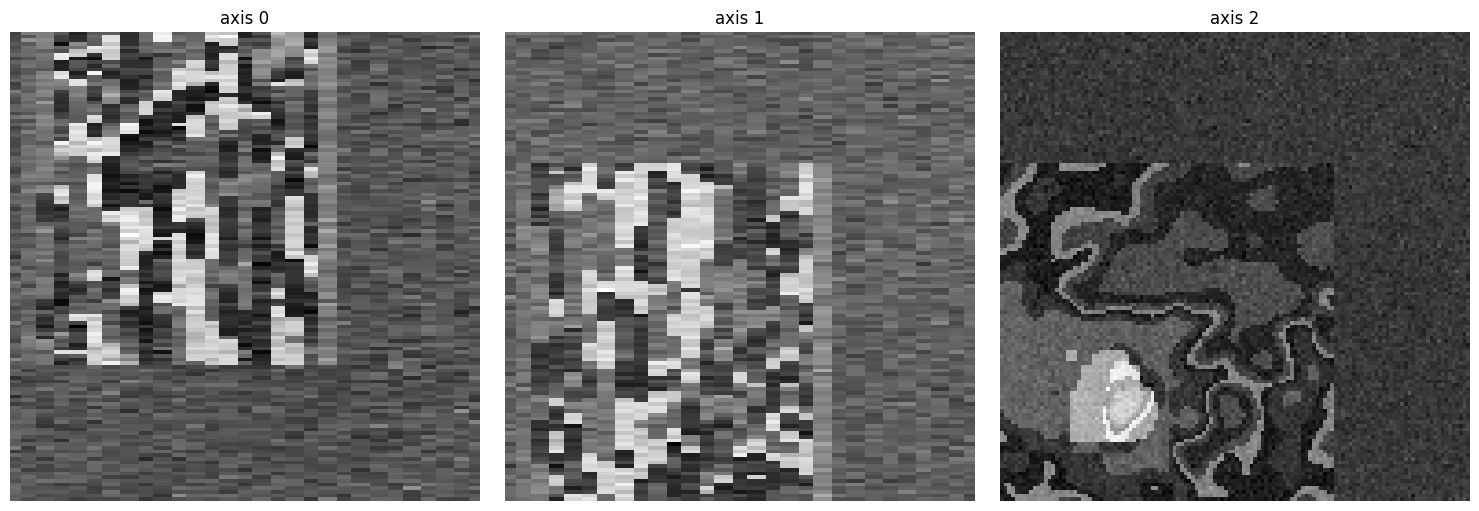

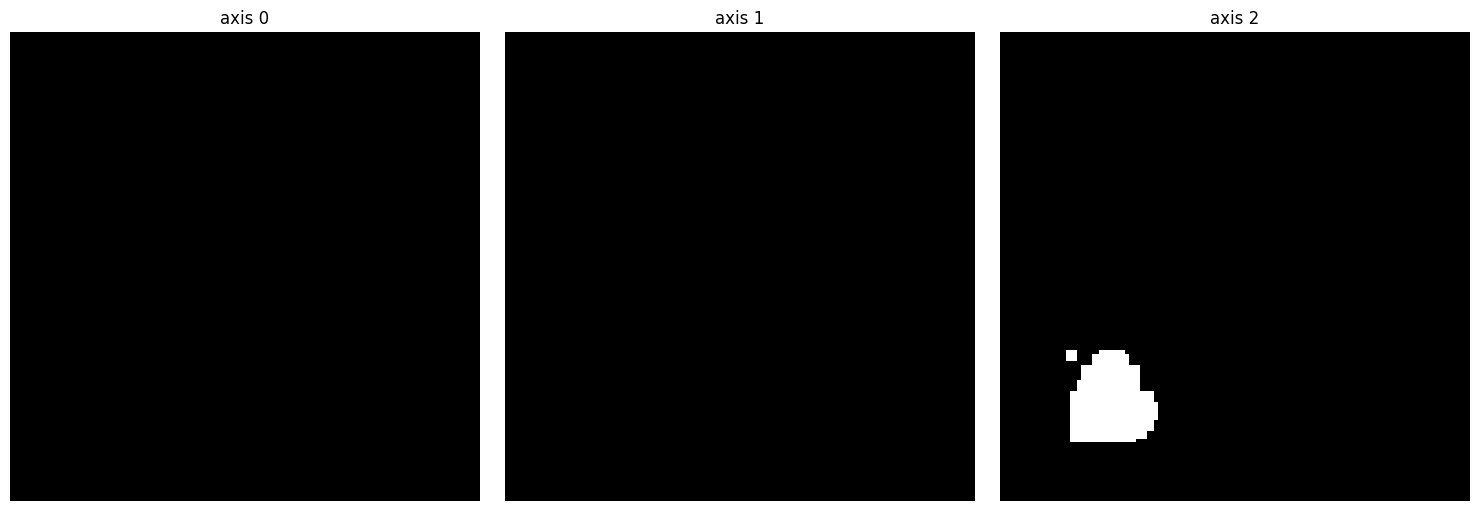

(64, 64, 64, 3)
tf.Tensor([128 128 128   1], shape=(4,), dtype=int32)
(1, 128, 128, 128, 1)


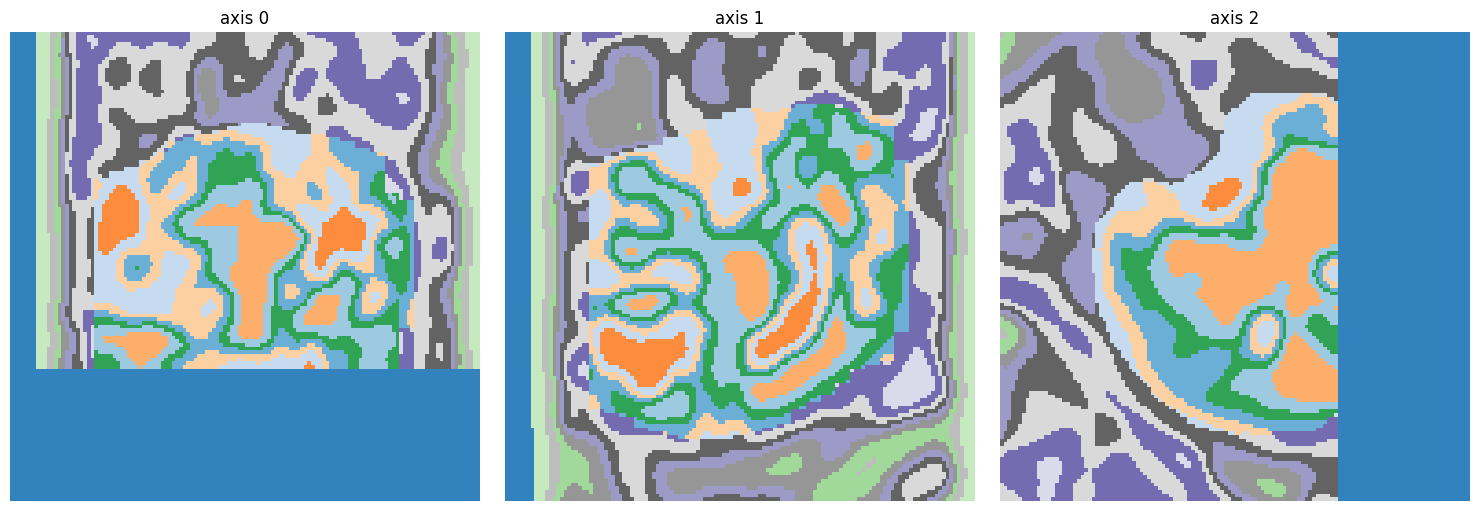

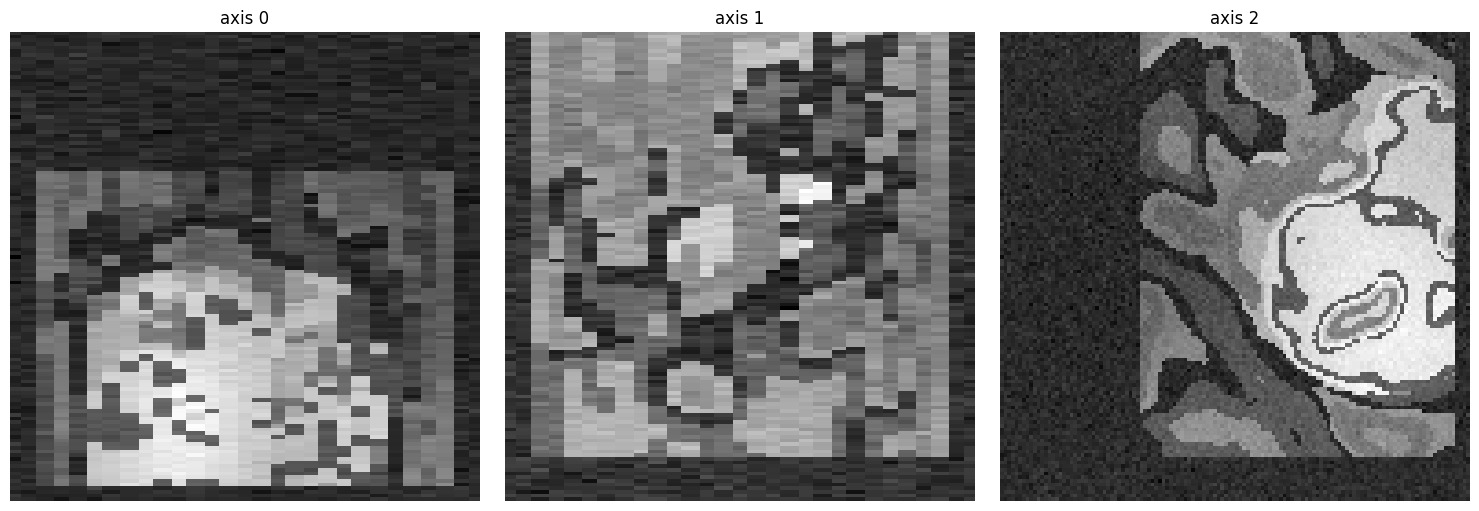

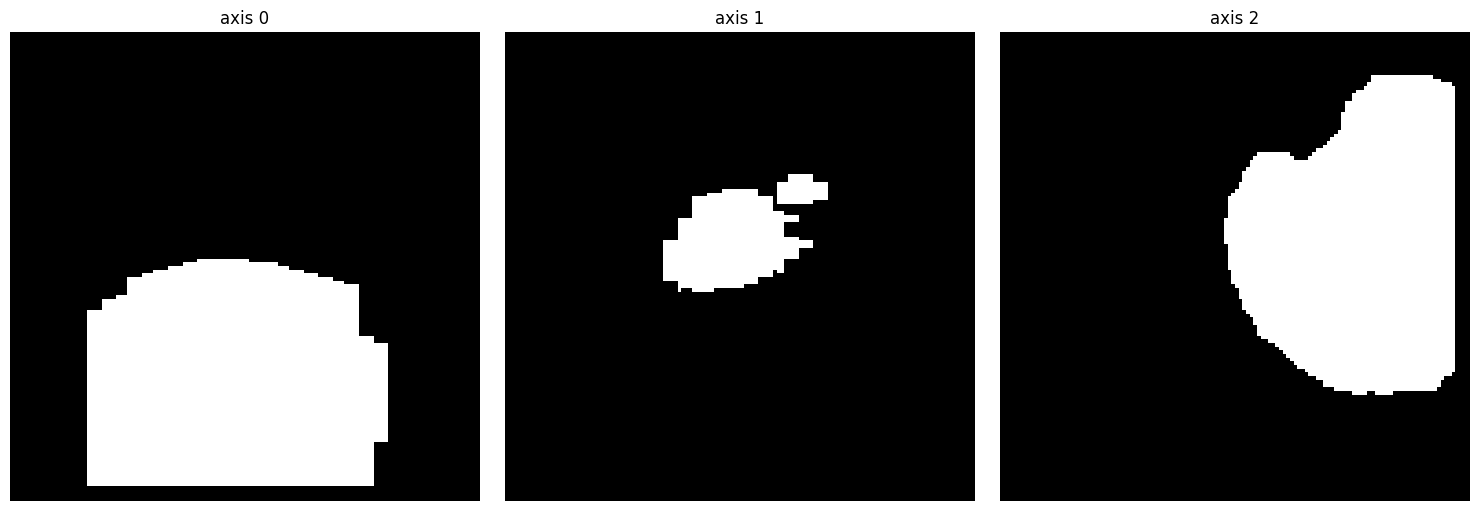

(64, 64, 64, 3)
tf.Tensor([128 128 128   1], shape=(4,), dtype=int32)
(1, 128, 128, 128, 1)


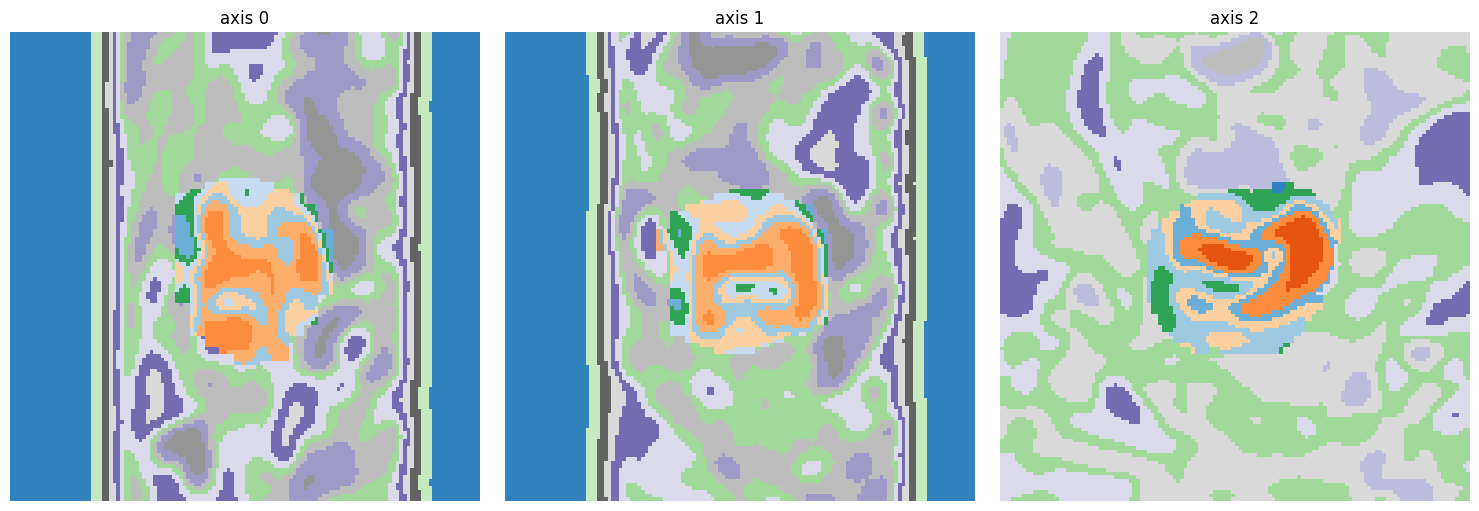

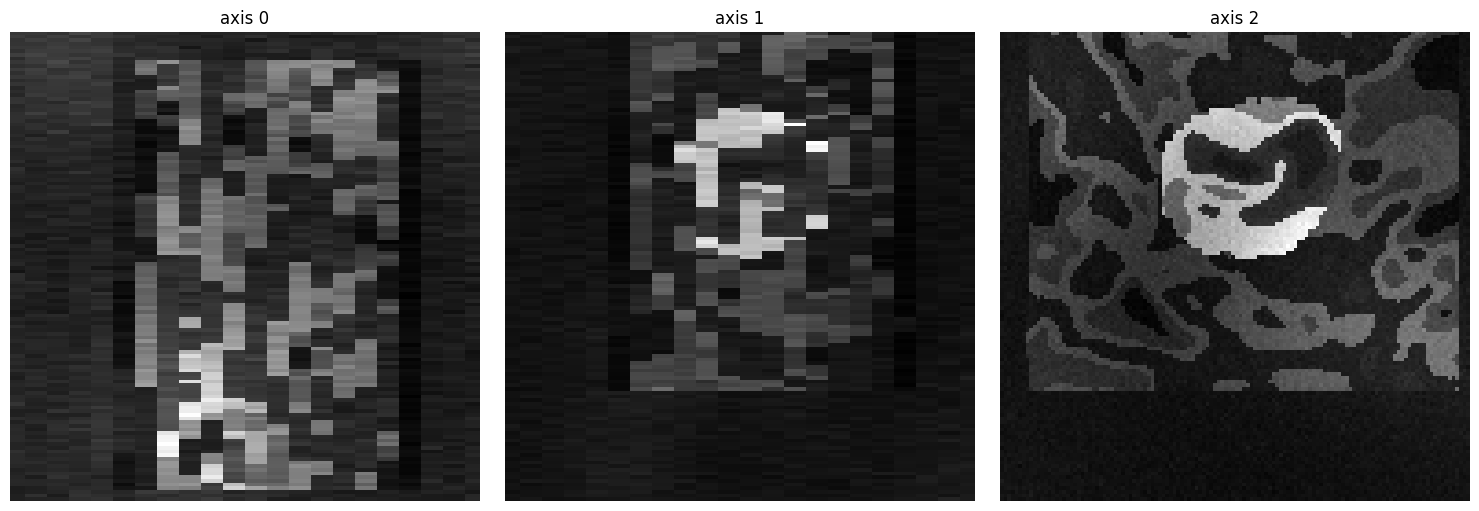

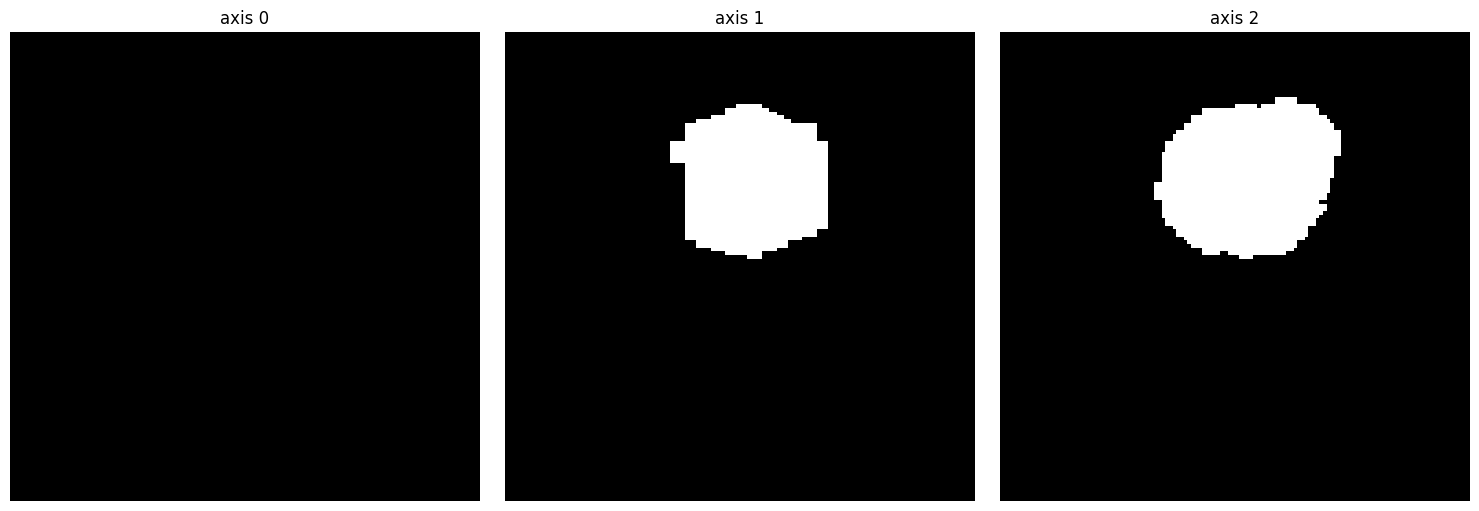

(64, 64, 64, 3)
tf.Tensor([128 128 128   1], shape=(4,), dtype=int32)
(1, 128, 128, 128, 1)


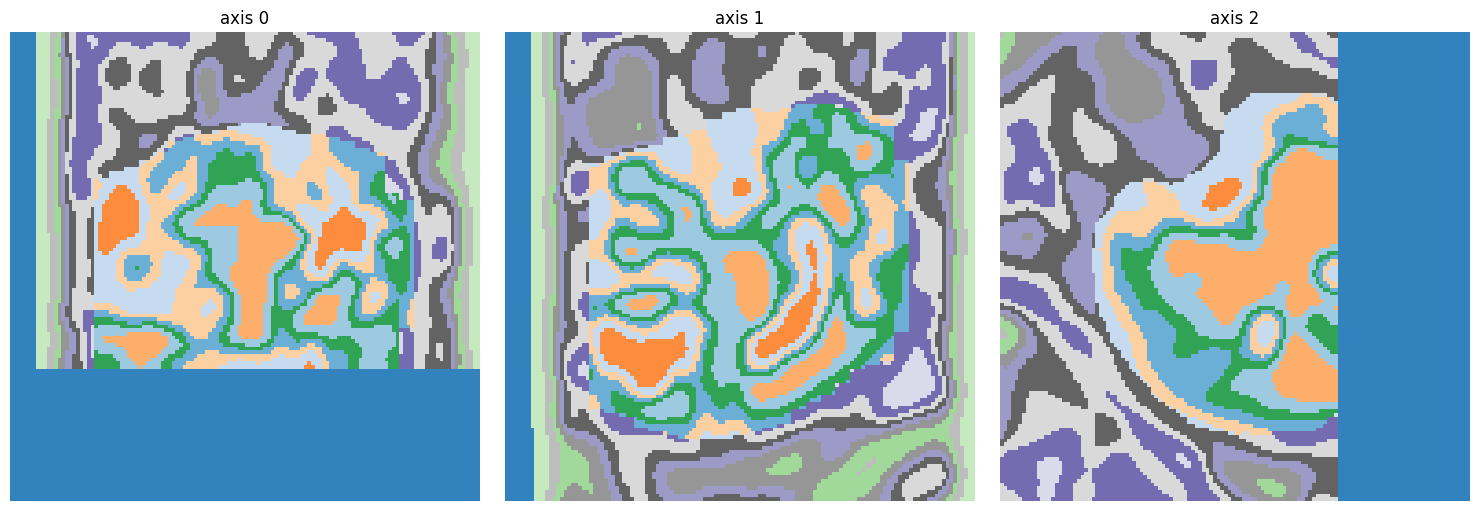

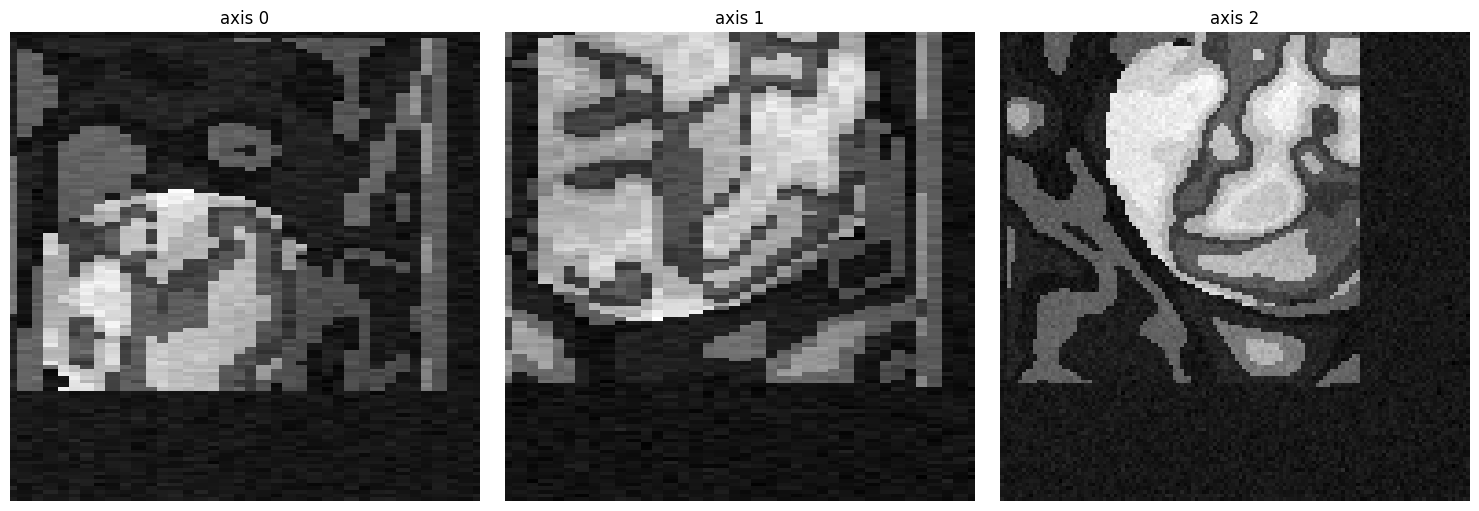

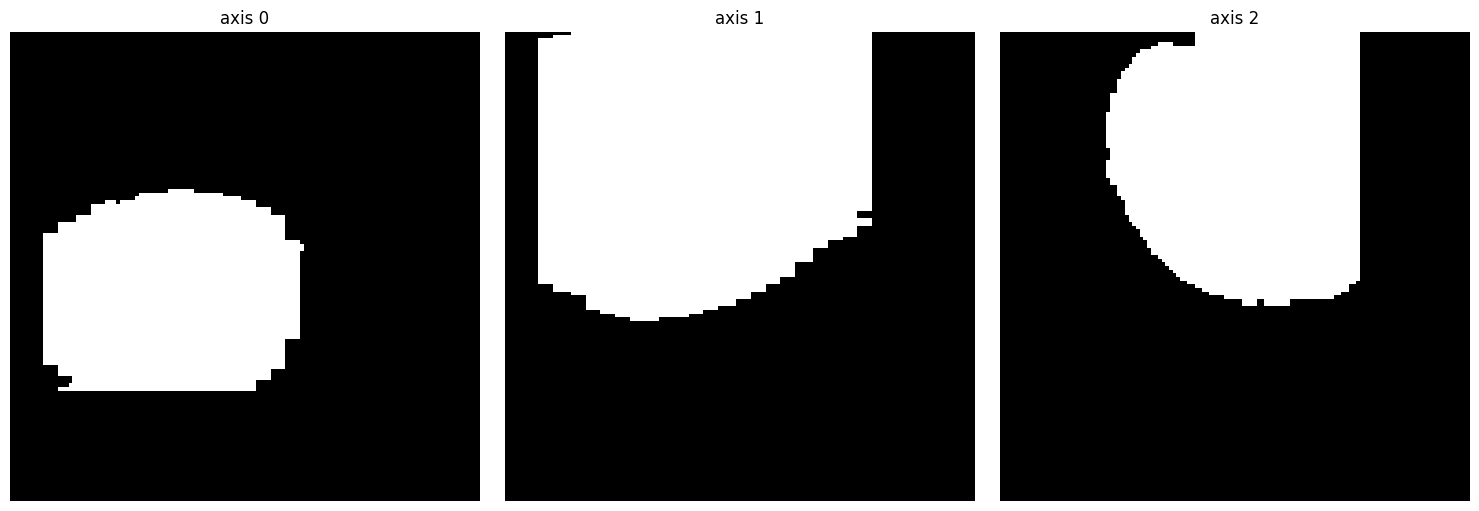

(64, 64, 64, 3)
tf.Tensor([128 128 128   1], shape=(4,), dtype=int32)
(1, 128, 128, 128, 1)


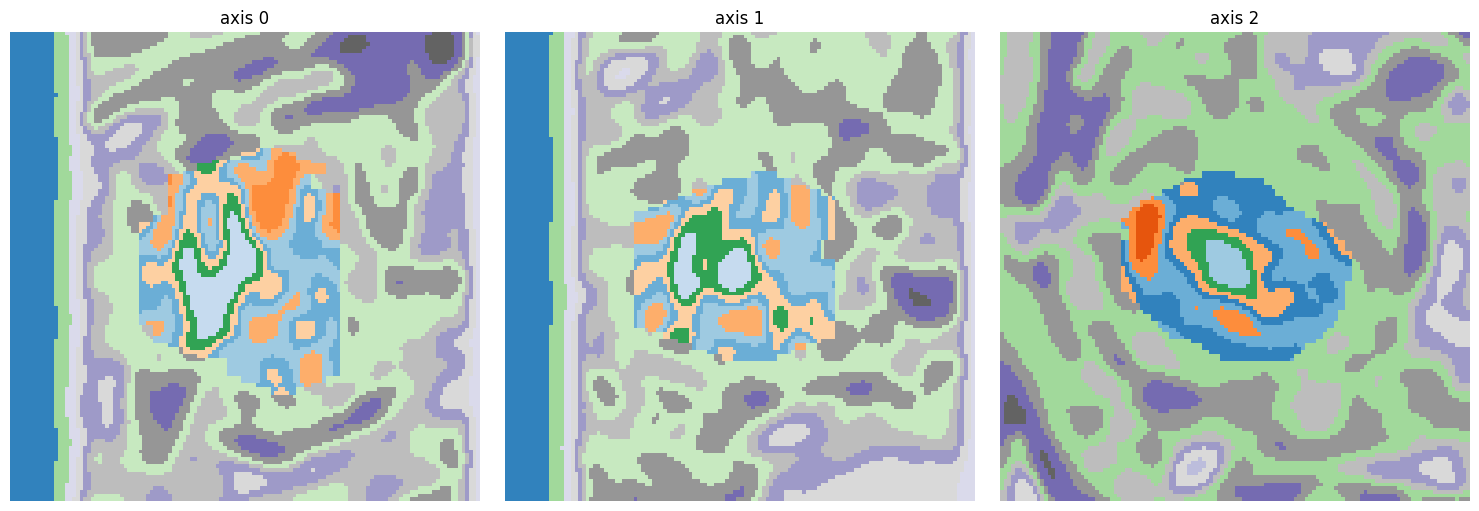

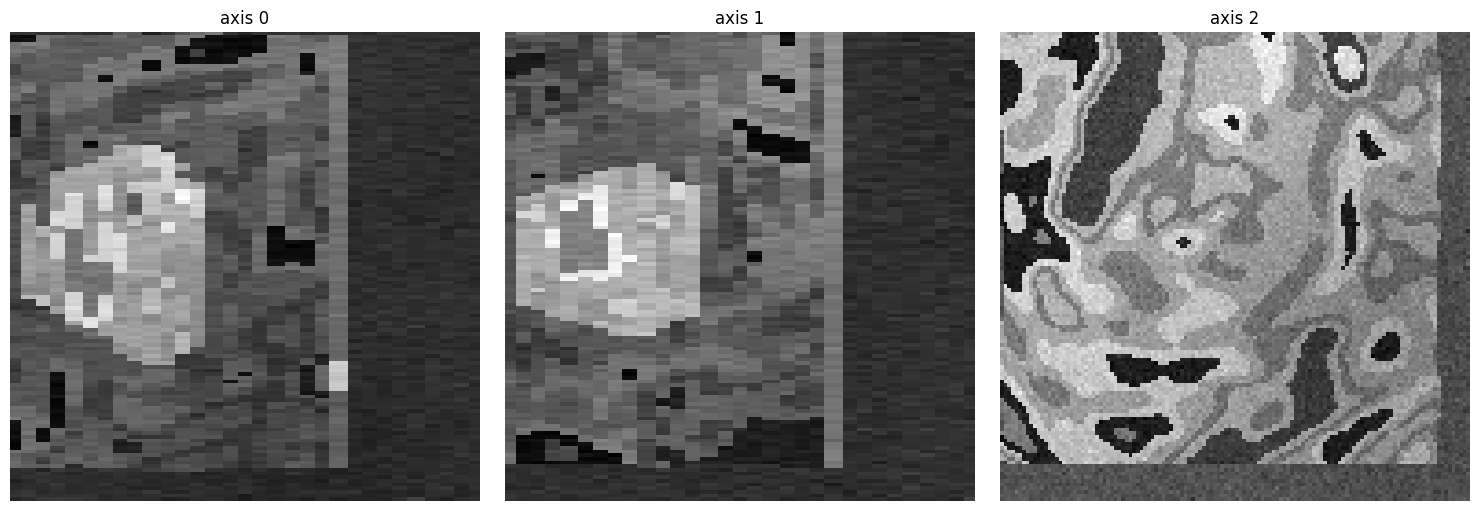

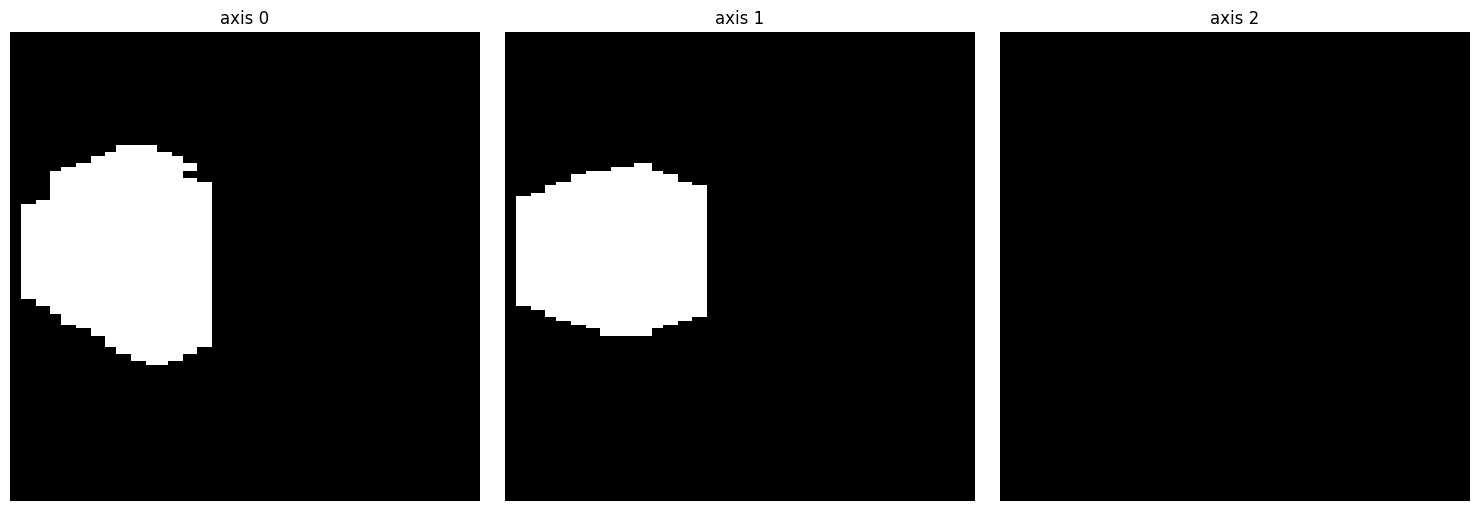

(64, 64, 64, 3)
tf.Tensor([128 128 128   1], shape=(4,), dtype=int32)
(1, 128, 128, 128, 1)


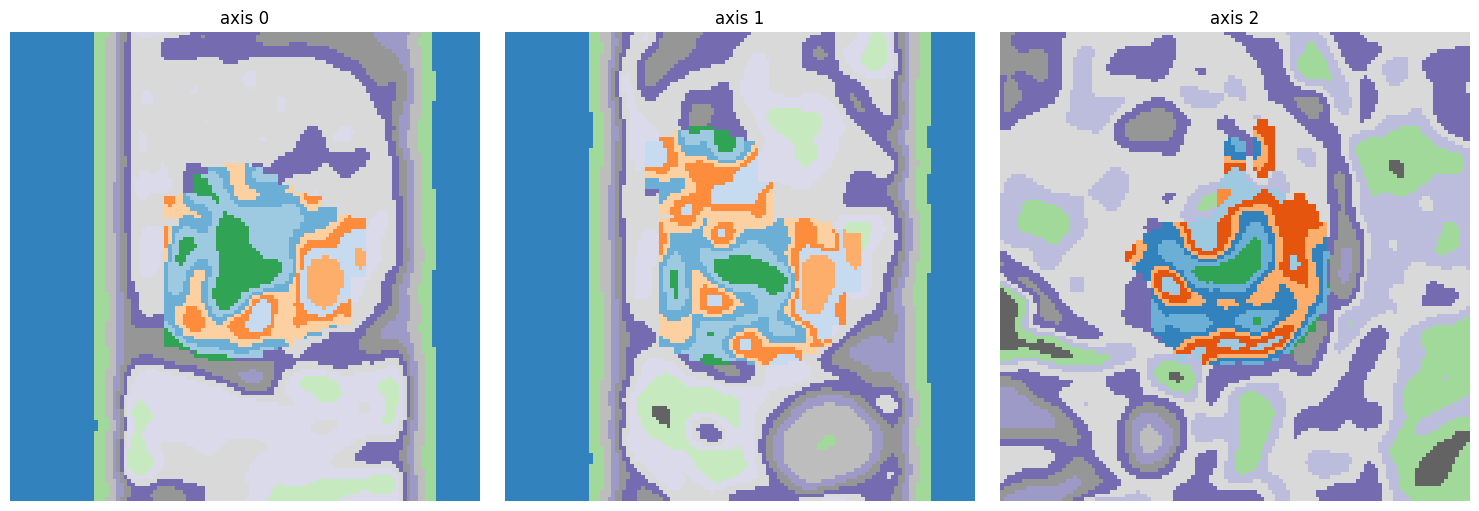

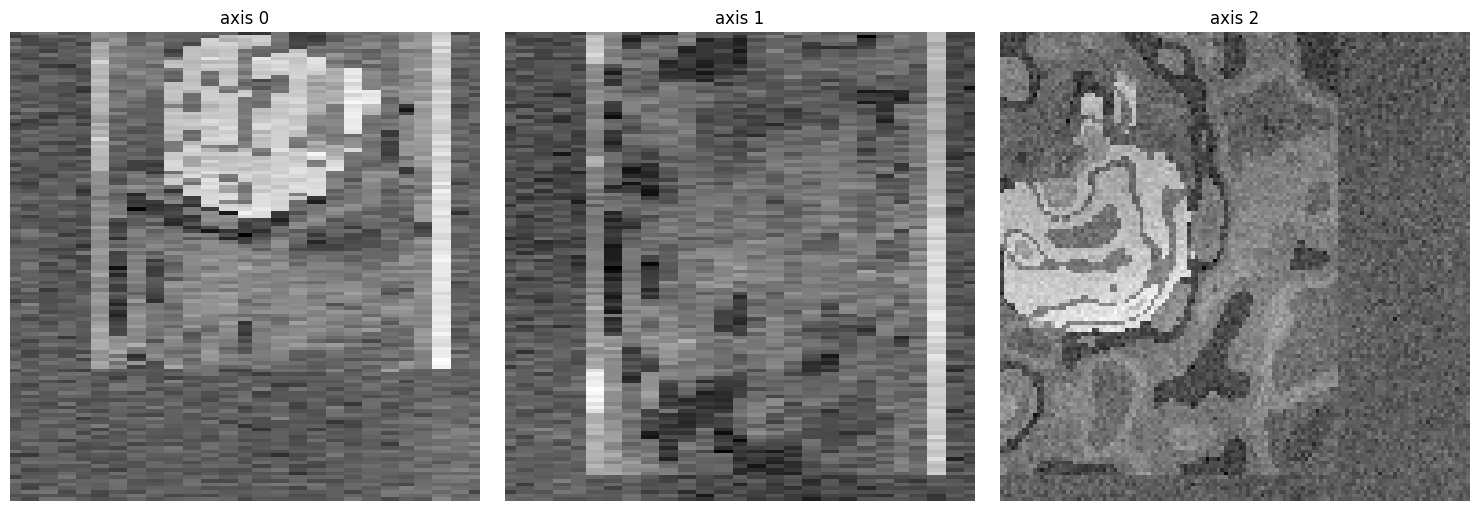

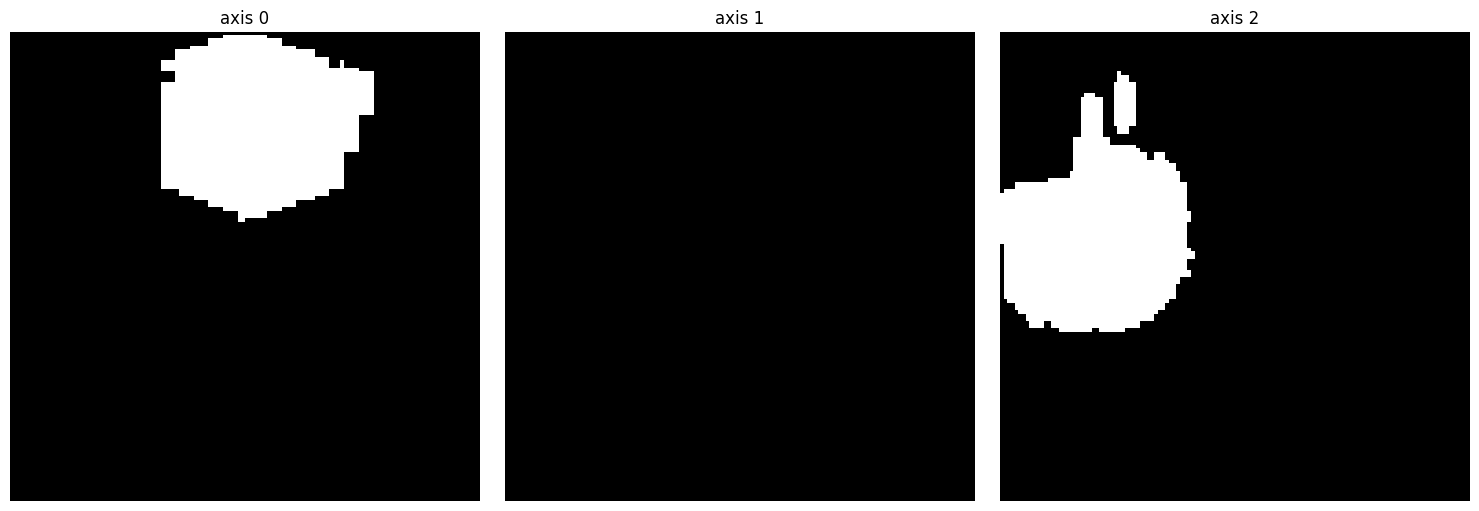

(64, 64, 64, 3)
tf.Tensor([128 128 128   1], shape=(4,), dtype=int32)
(1, 128, 128, 128, 1)


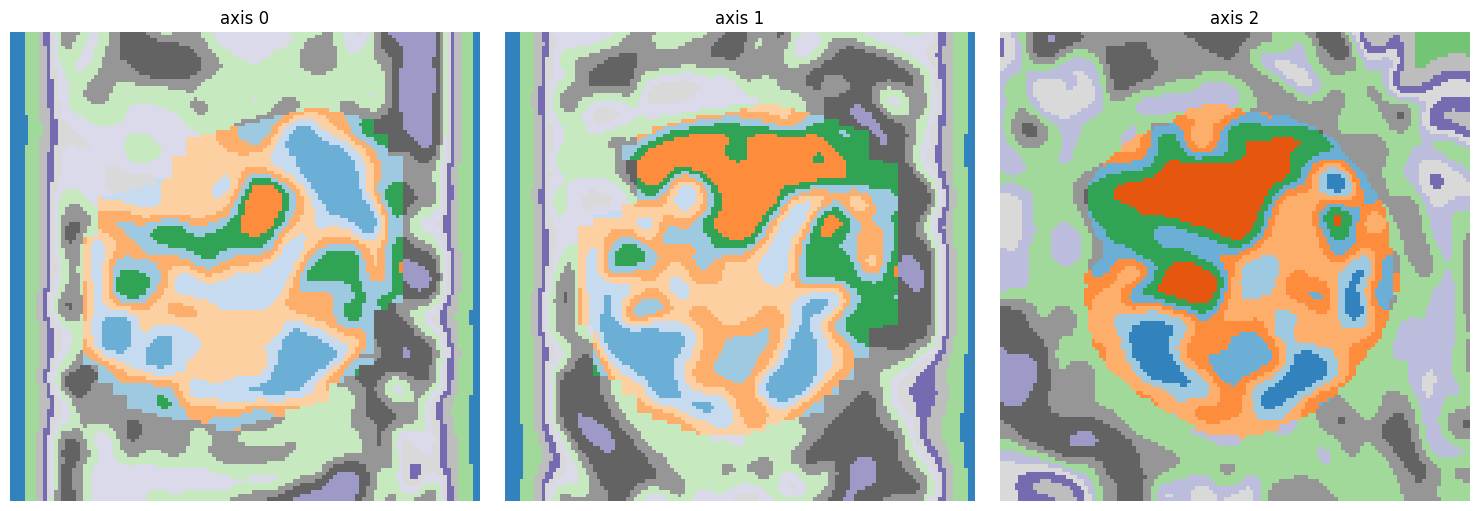

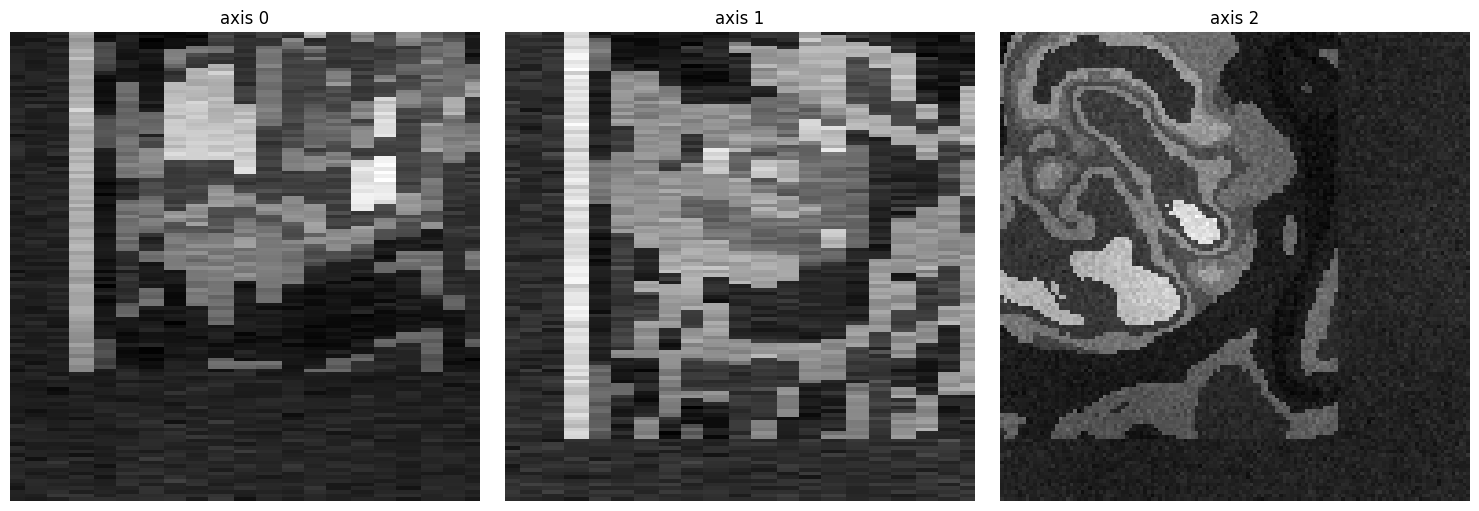

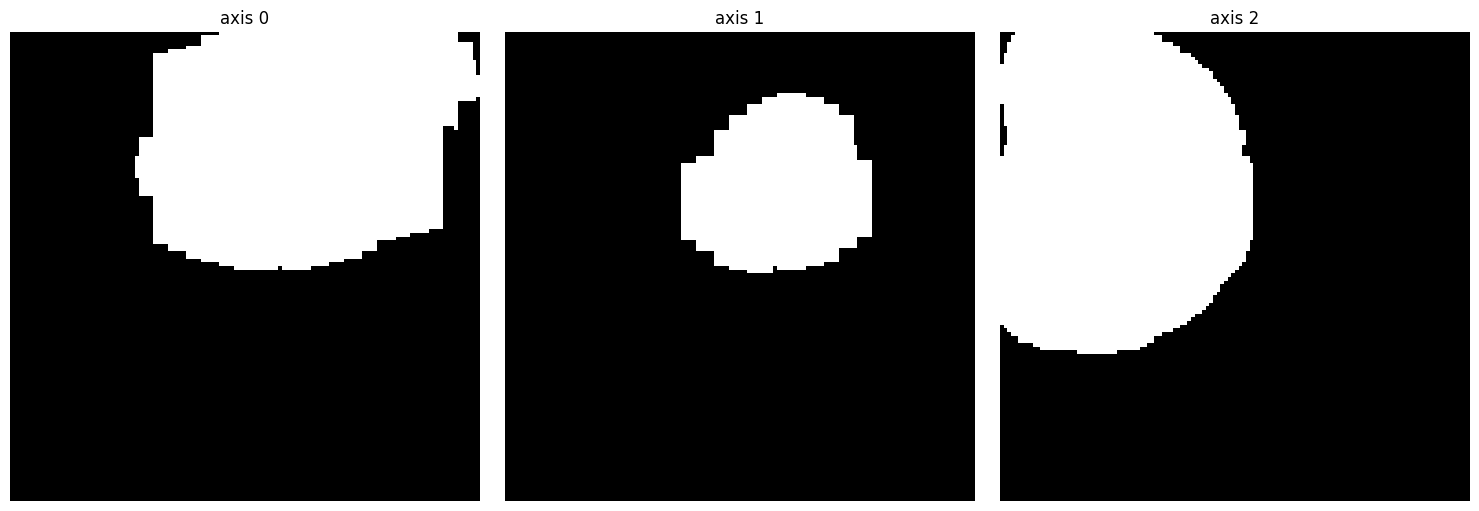

(64, 64, 64, 3)
tf.Tensor([128 128 128   1], shape=(4,), dtype=int32)
(1, 128, 128, 128, 1)


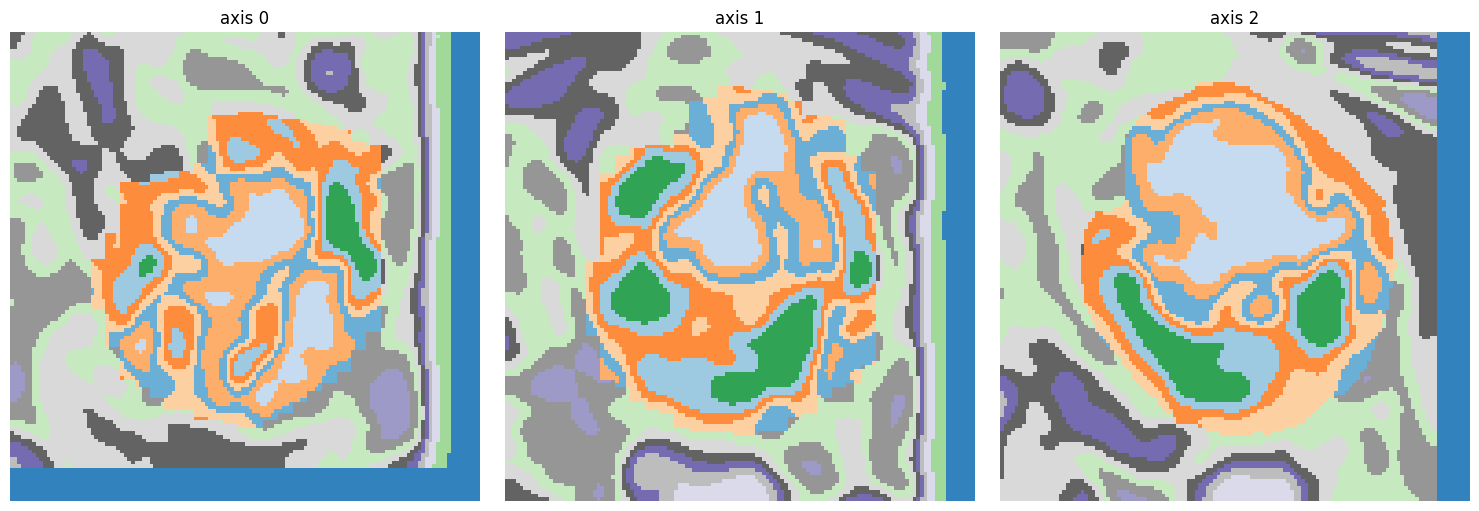

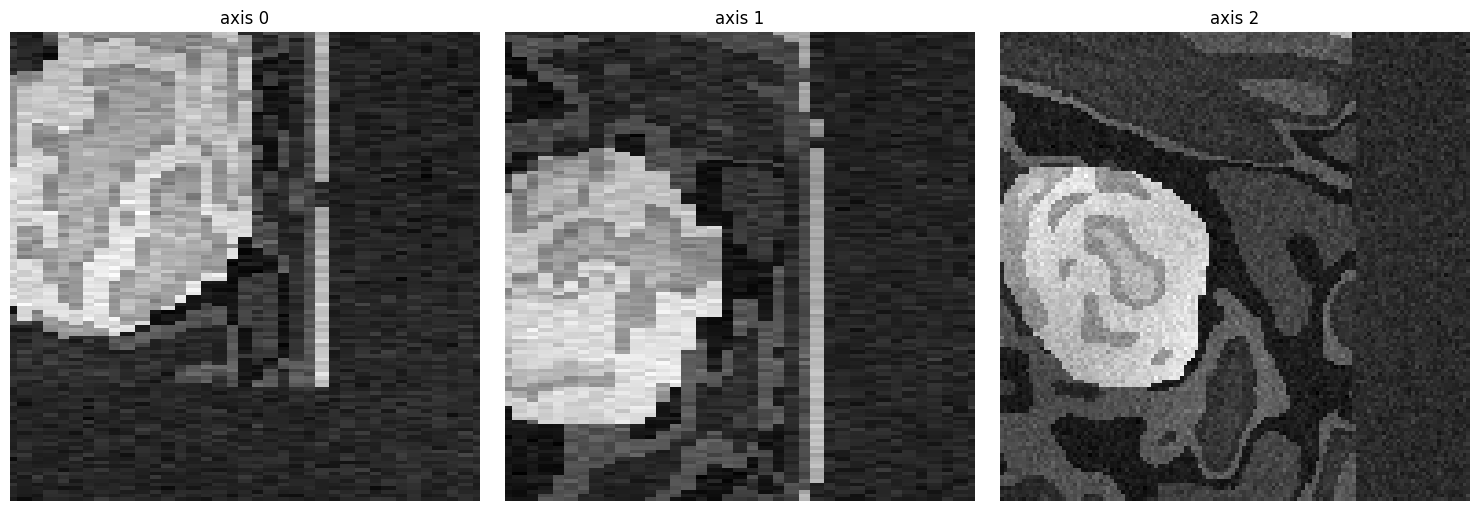

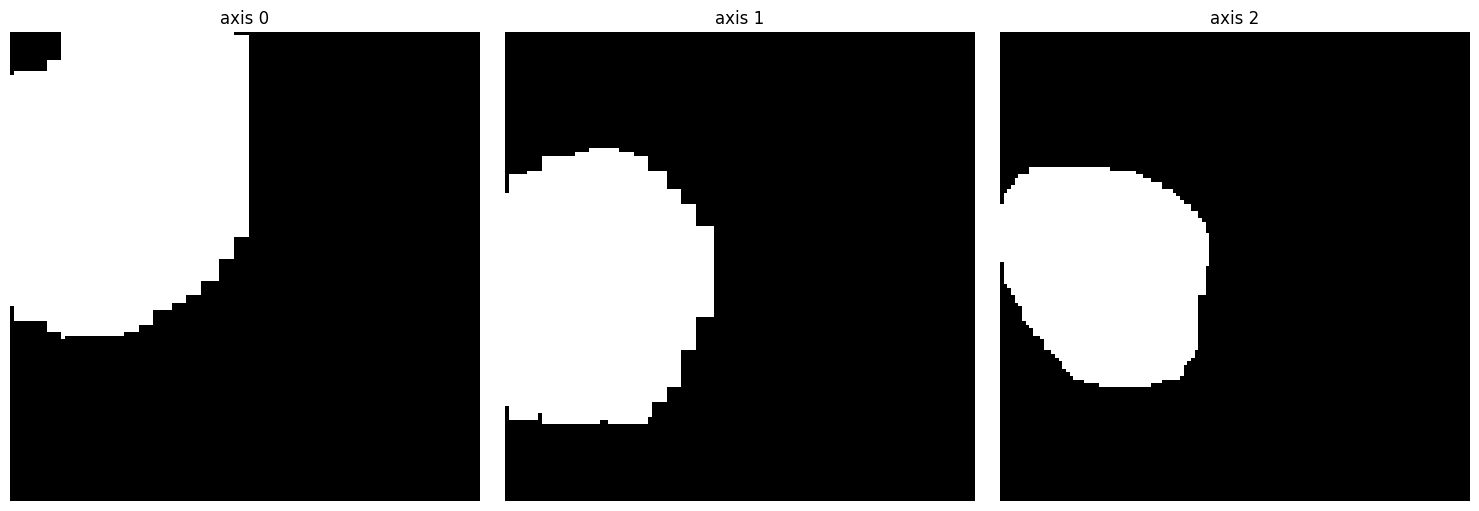

In [2]:
j=0

    
for i in range(9000):
    fragment = next(gen)

    # _, fg = model_feta(fragment)

    # print("fg",np.unique(fg))
    

    # # ms = tuple(map(int, measurements.center_of_mass(np.isin(fragment, [1, 2, 3, 4, 5, 6, 7]))))
    

    # # shapes = draw_shapes_easy(shape = (param_3d.img_size_12,)*3)    
    # shapes = draw_shapes(shape = (param_3d.img_size_48,)*3)

    # shapes = tf.squeeze(shapes)
    # shapes = tf.cast(shapes, tf.uint8)
    
    # _, bg = model_shapes(shapes[None,...,None])
    # bg = shift_non_zero_elements(bg,8)    
    # result = fg + bg * tf.cast(fg == 0,tf.int32)
    result = fragment
    generated_img, y = labels_to_image_model(result)
    # generated_img = apply_gaussian_smoothing(generated_img)
    print(generated_img.shape)
    z=np.argmax(y,axis=-1)
    ms = np.mean(np.column_stack(np.nonzero(z[0])), axis=0).astype(int)
    # ne.plot.volume3D(result[0,...,0],cmaps=['tab20c'],slice_nos=ms);

    ne.plot.volume3D(result,cmaps=['tab20c']);
    ne.plot.volume3D(generated_img);
    ne.plot.volume3D(np.argmax(y,axis=-1));

    j=j+1
    if j==15:
        break